In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

from formation_channels import * 


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import random # for random no drawing in Formation plot 



../../Scripts/PostProcessingScripts.py:25: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
../../Scripts/PostProcessingScripts.py:44: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
../../Scripts/PostProcessingScripts.py:45: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble'] = [r'\bol

In [2]:
from astropy.cosmology import WMAP9


print(WMAP9.Om([0.]))
print(WMAP9.Ode([0.]))
print(WMAP9.Ode)
print((1/WMAP9.H0).to(u.Gyr))

[0.2865]
[0.71341307]
<bound method FLRW.Ode of FlatLambdaCDM(name="WMAP9", H0=69.3 km / (Mpc s), Om0=0.286, Tcmb0=2.725 K, Neff=3.04, m_nu=[0. 0. 0.] eV, Ob0=0.0463)>
14.105485021361645 Gyr


In [3]:
BHNS_event = [45-33, 45, 45+75]
BHNS_pop = [130-69, 130, 130+112]

In [4]:
# DCOtype='BNS'
# BPSmodelName ='A'

# #####



# DCOname = DCOname_dict[DCOtype]

# # path for files 
# path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
# path_ = path_dir
# path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
# path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'




# # read in data 
# fdata = h5.File(path)



# seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
# channels = identify_formation_channels(seeds=seeds, file=fdata)




In [5]:
# mssfr = '000' # fiducial 
# ############


# # M1 will be the most massive, M2 the least massive compact object. 
# M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
# #     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])


# fparam_intrinsic = 'weights_intrinsic' ## get intrinsic weights
# fparam_detected = 'weights_detected' ## get detected weights
# weightheader = 'w_' + mssfr

# w_det = fdata[fparam_detected][weightheader][...].squeeze()
# w_int = fdata[fparam_intrinsic][weightheader][...].squeeze()



# channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}   

  

In [6]:
def plot_3Msun_lines(axes, xlim=[1,100]):
    
    # m1 = 3 Msun 
    q = np.linspace(0, 1, 100)
    m1 = 3
    mtot = (q+1) * m1
    
    axes.plot(mtot, q, c='gray', lw=2, linestyle=':', zorder=1E4)
    axes.text(mtot[10], q[10], s=r'$m_1 = 3 \, \rm{M}_{\odot}$', fontsize=fs-6, rotation=72, va='bottom', ha='center')
        
    # m2 = 3 Msun 
    q=np.linspace(0.001, 1, 100)
    m2 = 3 # Msun 
    mtot = (1+(1/q))*m2
    axes.plot(mtot, q, c='gray', lw=2, linestyle=':', zorder=1E4)
    axes.text(mtot[2], q[2], s=r'$m_2 = 3 \, \rm{M}_{\odot}$', fontsize=fs-6, rotation=-3)
    
    

    return



def make_up_axes(axes=None, xlim=[2,400], ylim=[0,1], xlabel=r'Total mass $[M_{\odot}]$', ylabel=r'q', logX=True,  logY=False):
    
    
    if (xlabel!=None) & (ylabel!=None):
        layoutAxes(ax=axes, nameX=xlabel, nameY=ylabel, labelpad=20)
    elif xlabel==None:
        layoutAxesNoXlabel(ax=axes, nameX=xlabel, nameY=ylabel, labelpad=20)
    elif ylabel==None:
        layoutAxesNoYlabel(ax=axes, nameX=xlabel, nameY=ylabel, labelpad=20)    
        
    axes.set_xlim(xlim[0],xlim[1])
    axes.set_ylim(ylim[0], ylim[1])
    
    if logX!=False:
        axes.set_xscale('log')     
    if logY!=False:
        axes.set_yscale('log')       
    return 




def plot_x_ticks(axe=None, xtick_loc=[1, 2, 4, 7, 10, 20, 40, 70, 100, 200, 400], ytick_loc=[0.2, 0.4, 0.6, 0.8], xlim=[2,400], ylim=[0,1]):
    

    
    xtick_name = []
    for ind, xtick in enumerate(xtick_loc):
        xtick_name.append(str(xtick))
        axe.plot(np.ones(100)*xtick, np.linspace(ylim[0], ylim[1], 100), c='lightgray', lw=1.2, linestyle='-', zorder=0)
    
    axe.set_xticks(xtick_loc)
    axe.set_xticklabels(xtick_name, fontsize=fs, rotation=0)#, orientation=30) 
    
    
    ytick_name = []
    for ind, ytick in enumerate(ytick_loc):
        ytick_name.append(str(ytick))
        axe.plot(np.linspace(xlim[0], xlim[1], 100), np.ones(100)*ytick, c='lightgray', lw=1.2, linestyle='-', zorder=0)
    
    axe.set_yticks(ytick_loc)
    axe.set_yticklabels(ytick_name, fontsize=fs, rotation=0)#, orientation=30)  
    
    axe.set_xlim(xlim[0], xlim[1])
    axe.set_ylim(ylim[0], ylim[1])
    
    
    # grid lines:
    
    
    
    return 





def plot_x_ticks_formation_channels(axe=None, xtick_loc=[1, 2, 4, 7, 10, 20, 40, 70, 100, 200, 400], ytick_loc=[0.1, 0.3, 0.5, 0.7, 0.9], xlim=[2,400], ylim=[0,1]):
    


        
    dictChannelsBHNSListBoltWithEnter = [r'\textbf{(V)}' +'\n'+ r'\textbf{Other}',  r'\textbf{(IV)}' +'\n'+ r'\textbf{Double-core CE}' +'\n'+ r'\textbf{as first mass transfer}', r'\textbf{(III)}' +'\n'+ r'\textbf{Single-core CE}' +'\n'+ r'\textbf{as first mass transfer}',\
    r'\textbf{(II)}' +'\n'+ r'\textbf{Only stable}' +'\n'+ r'\textbf{mass transfer}', r'\textbf{(I)}' +'\n'+ r'\textbf{Classic}']  
    
    
    xtick_name = []
    for ind, xtick in enumerate(xtick_loc):
        xtick_name.append(str(xtick))
        axe.plot(np.ones(100)*xtick, np.linspace(ylim[0], ylim[1], 100), c='lightgray', lw=1.2, linestyle='-', zorder=0)
    
    axe.set_xticks(xtick_loc)
    axe.set_xticklabels(xtick_name, fontsize=fs+2, rotation=0)#, orientation=30) 
    
    
    ytick_name = []
    for ind, ytick in enumerate([0.2, 0.4, 0.6, 0.8]):
        axe.plot(np.linspace(xlim[0], xlim[1], 100), np.ones(100)*ytick, c='lightgray', lw=1.2, linestyle='-', zorder=0)
    
    axe.set_yticks(ytick_loc)
    axe.set_yticklabels(dictChannelsBHNSListBoltWithEnter, fontsize=fs-4, rotation=0)#, orientation=30)  
    
    axe.set_xlim(xlim[0], xlim[1])
    axe.set_ylim(ylim[0], ylim[1])
    
    
    # grid lines:
    
    
    
    return 

In [7]:
def add_GW_credible_intervals(axes):
    
    

    cmapCustom = matplotlib.colors.LinearSegmentedColormap.from_list("", [   "white", 'b'])
    Nbinsx, Nbinsy = 100, 100 
    Range = [[0,200], [0,1]]
    # use 2D hist to obtain density of samples over range. 
    H, xedges, yedges = np.histogram2d(total_mass_source, 1./symmetric_mass_ratio, bins=(Nbinsx,Nbinsy), range = Range)
    xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])


    # Smooth the contours (if astropy is installed)
    if astro_smooth:
        kernel = Gaussian2DKernel(x_stddev=1.3, y_stddev=1.3)
        H=convolve(H,kernel)
        print(np.log10(np.max(H.T))   )
        print((np.min(H.T))   )
        #max density in highest contour
        maxLevel = 2.8
        minLevel = 0.8

    Levels = np.logspace(minLevel, maxLevel, 3)    

    cmapping = axes.contourf(xmesh,ymesh,H.T,lw=.9,cmap=cmapCustom, levels = Levels, linewidths= 1.75, norm= mpl.colors.LogNorm(vmin=np.min(Levels),vmax=np.max(Levels)), alpha = 1)#,zorder=90)
    axes.contourf(xmesh,ymesh,H.T,cmap=cmapCustom, levels = Levels, linewidths= 1.75, norm= mpl.colors.LogNorm(vmin=np.min(Levels),vmax=np.max(Levels)), alpha = 1, zorder=0)#,zorder=90)

    
    
    return 

# LIEKE CHECK 

# INTRINSIC LOG DELAY VS MBH1 , only BHs

now at DCOtype BBH
channel = 1 model =  A
weighted mean t_delay = 1.1825806914952264 Gyr
weighted mean  log10 t_delay = -0.5818058219572396 Gyr
weighted median t_delay = 0.22289081665288762 Gyr
weighted median  log10 t_delay = -0.6519078245620947 Gyr


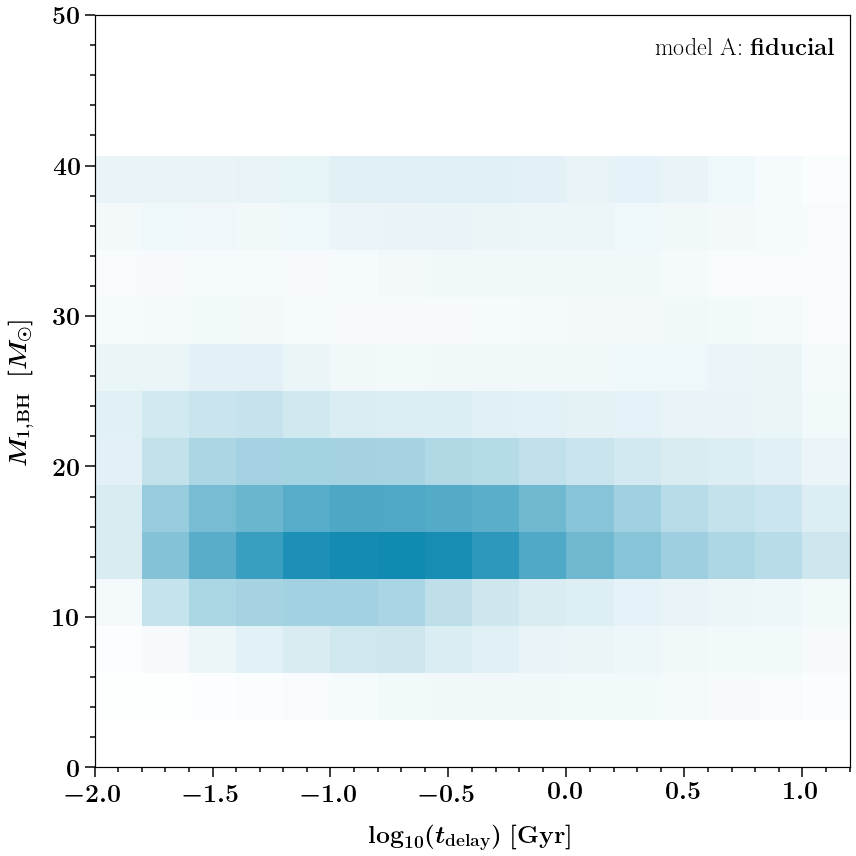

channel = 2 model =  A
weighted mean t_delay = 4.0034442246128155 Gyr
weighted mean  log10 t_delay = 0.3295873500009668 Gyr
weighted median t_delay = 2.649933969623248 Gyr
weighted median  log10 t_delay = 0.42323505243254295 Gyr


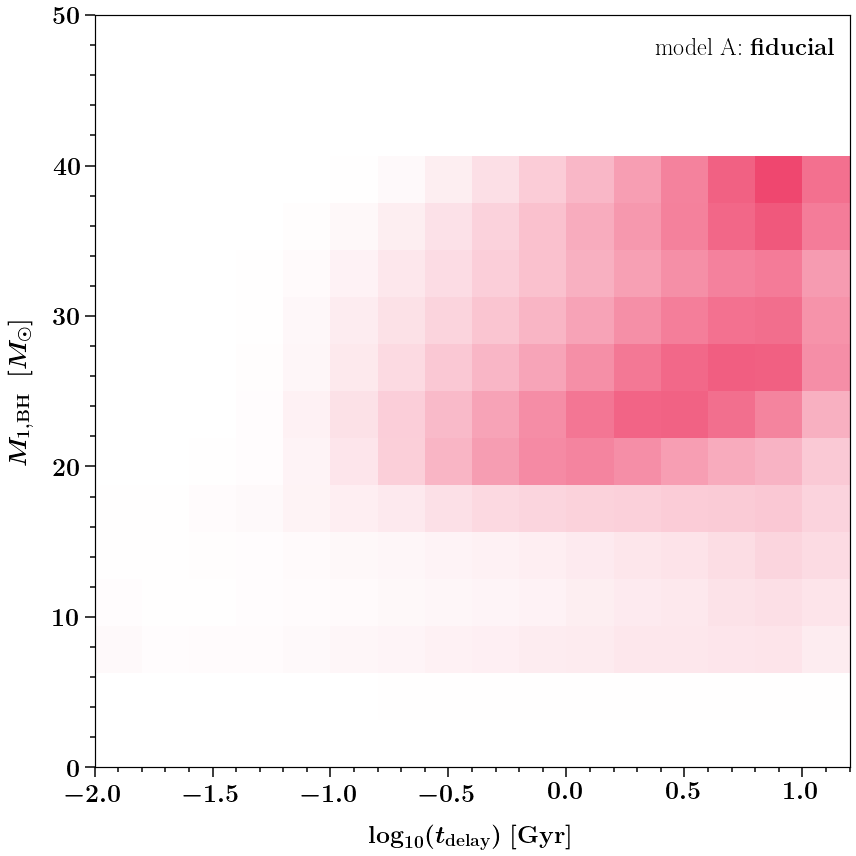

now at DCOtype BBH
channel = 1 model =  B
weighted mean t_delay = 0.9502531812109605 Gyr
weighted mean  log10 t_delay = -0.7429238845112548 Gyr
weighted median t_delay = 0.1388496980064705 Gyr
weighted median  log10 t_delay = -0.8574550604889246 Gyr


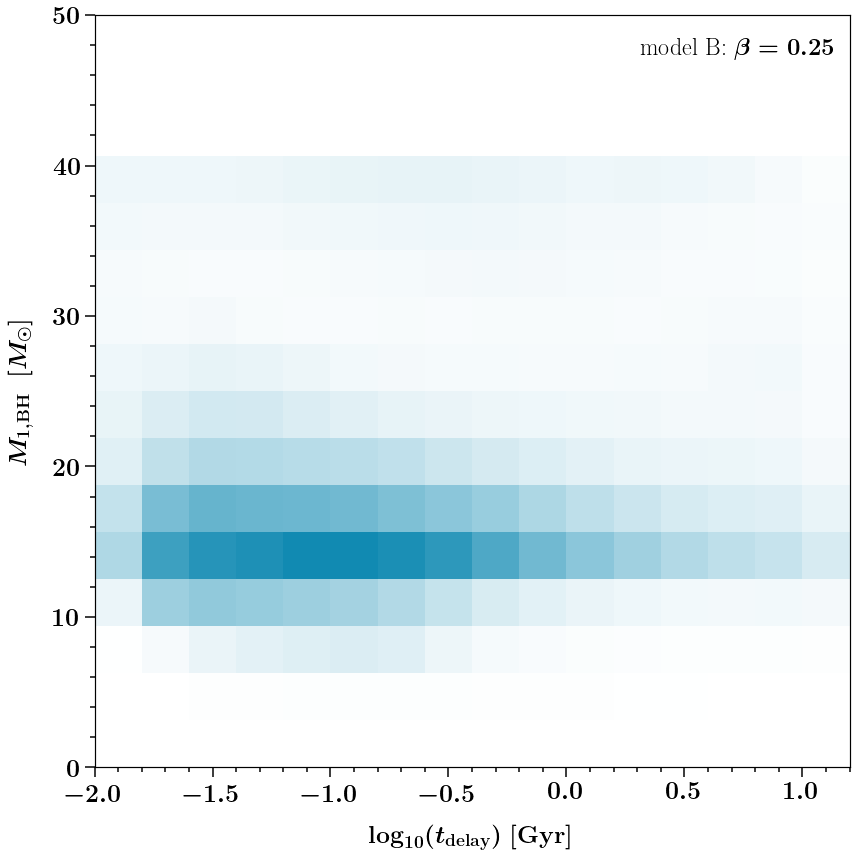

channel = 2 model =  B
weighted mean t_delay = 3.986399526634104 Gyr
weighted mean  log10 t_delay = 0.16805917755375732 Gyr
weighted median t_delay = 2.486629043982152 Gyr
weighted median  log10 t_delay = 0.39561100180543857 Gyr


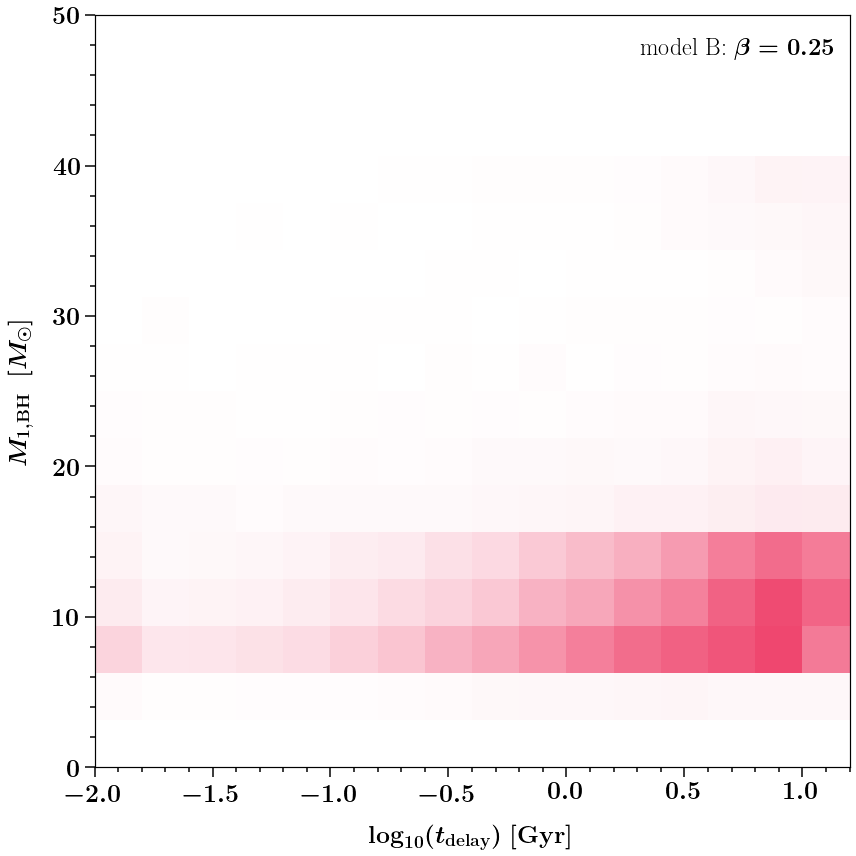

now at DCOtype BBH
channel = 1 model =  C
weighted mean t_delay = 1.1240512847930968 Gyr
weighted mean  log10 t_delay = -0.6775192517592884 Gyr
weighted median t_delay = 0.16956786882167732 Gyr
weighted median  log10 t_delay = -0.7706564381374345 Gyr


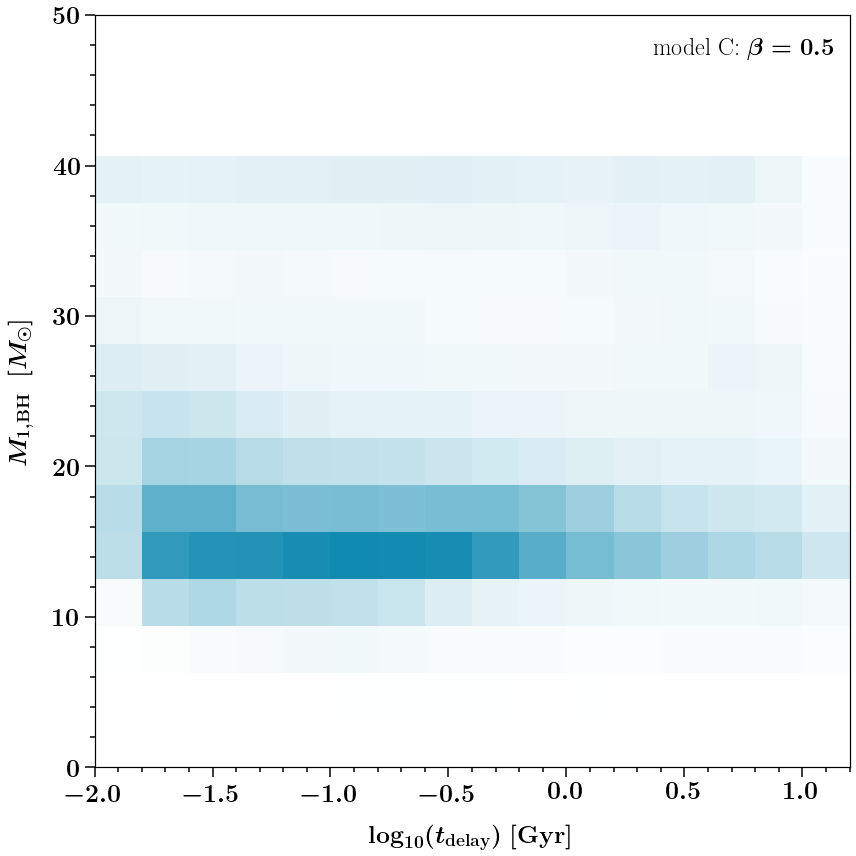

channel = 2 model =  C
weighted mean t_delay = 5.052563121985764 Gyr
weighted mean  log10 t_delay = 0.38983189471413443 Gyr
weighted median t_delay = 4.085106192601211 Gyr
weighted median  log10 t_delay = 0.6112033505283677 Gyr


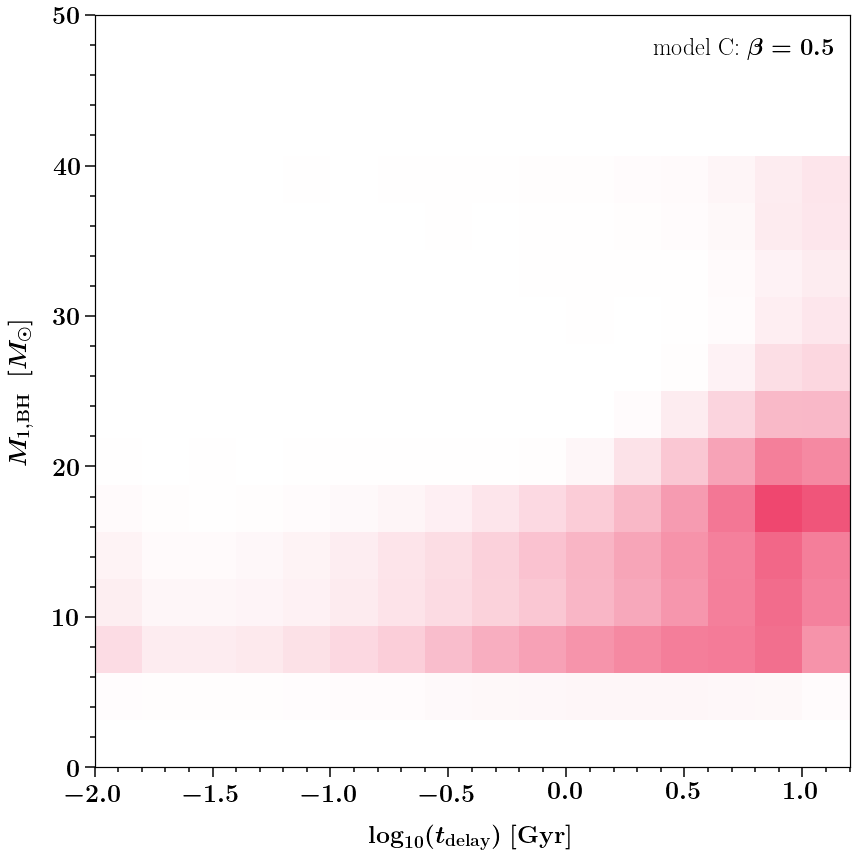

now at DCOtype BBH
channel = 1 model =  D
weighted mean t_delay = 1.3406930525382783 Gyr
weighted mean  log10 t_delay = -0.514099341314985 Gyr
weighted median t_delay = 0.2925054661078485 Gyr
weighted median  log10 t_delay = -0.5338660137587262 Gyr


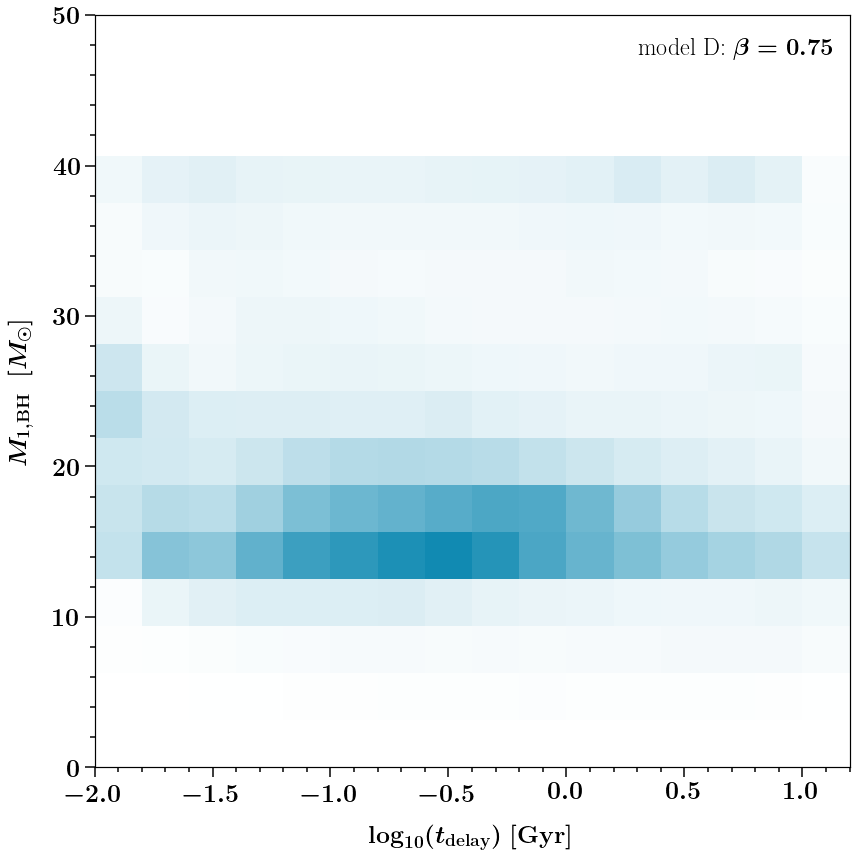

channel = 2 model =  D
weighted mean t_delay = 4.9679250424936106 Gyr
weighted mean  log10 t_delay = 0.44854097074153887 Gyr
weighted median t_delay = 3.9412552751477112 Gyr
weighted median  log10 t_delay = 0.5956345650349988 Gyr


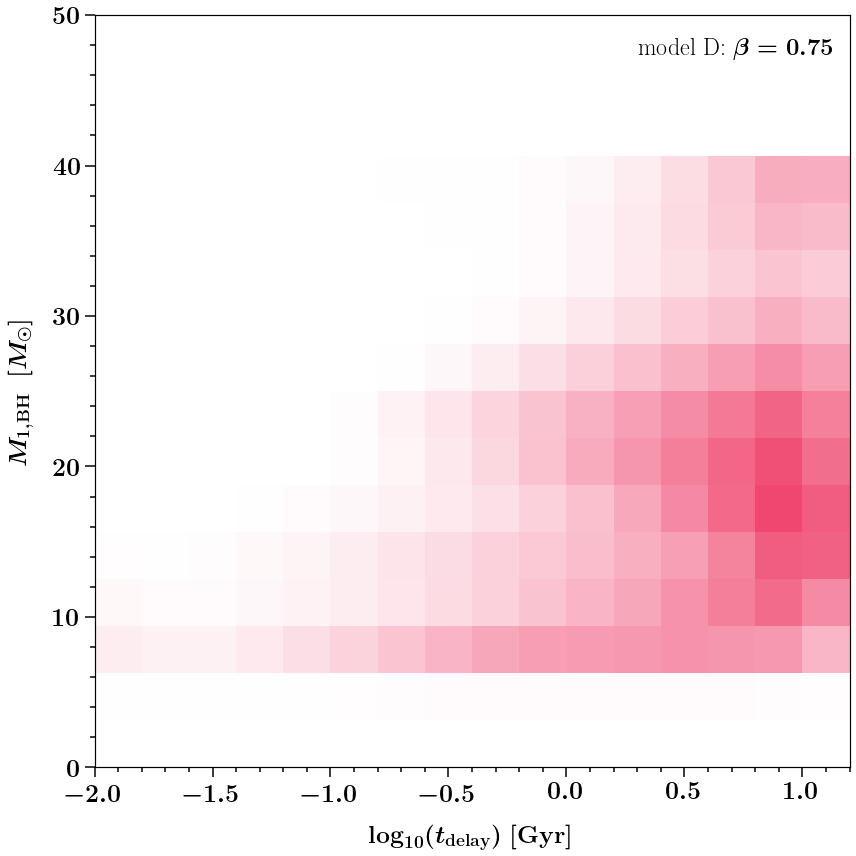

now at DCOtype BBH
channel = 1 model =  G
weighted mean t_delay = 0.5935032589460643 Gyr
weighted mean  log10 t_delay = -1.095718531669644 Gyr
weighted median t_delay = 0.04999096593460749 Gyr
weighted median  log10 t_delay = -1.3011084716501953 Gyr


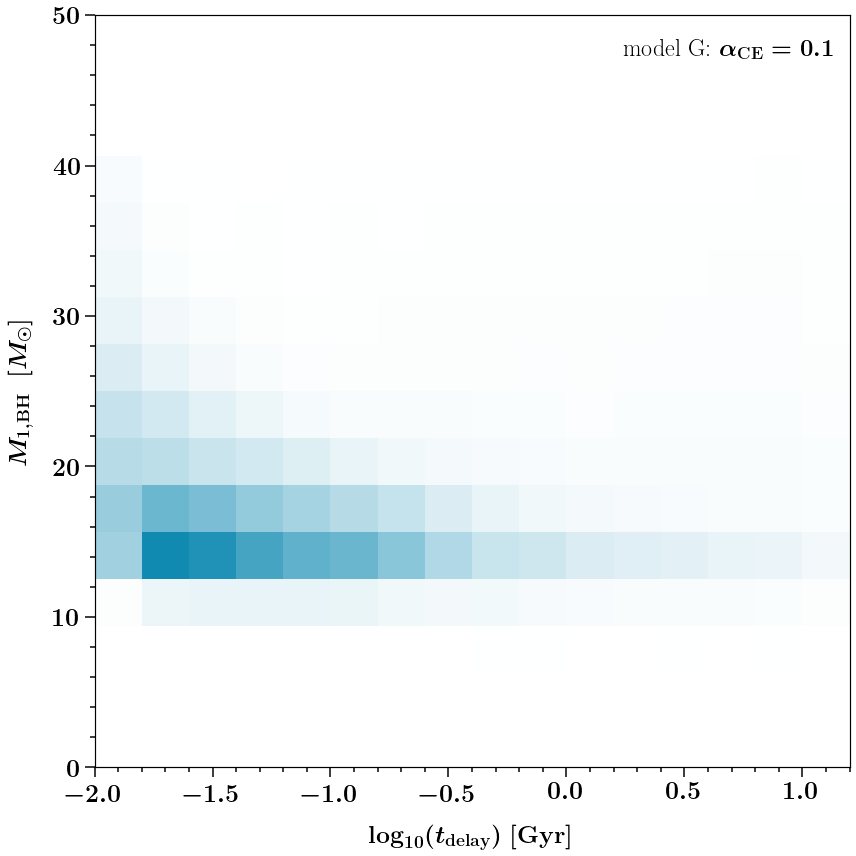

channel = 2 model =  G
weighted mean t_delay = 4.008263009190013 Gyr
weighted mean  log10 t_delay = 0.3305510570853066 Gyr
weighted median t_delay = 2.6587727632745417 Gyr
weighted median  log10 t_delay = 0.42468122117019014 Gyr


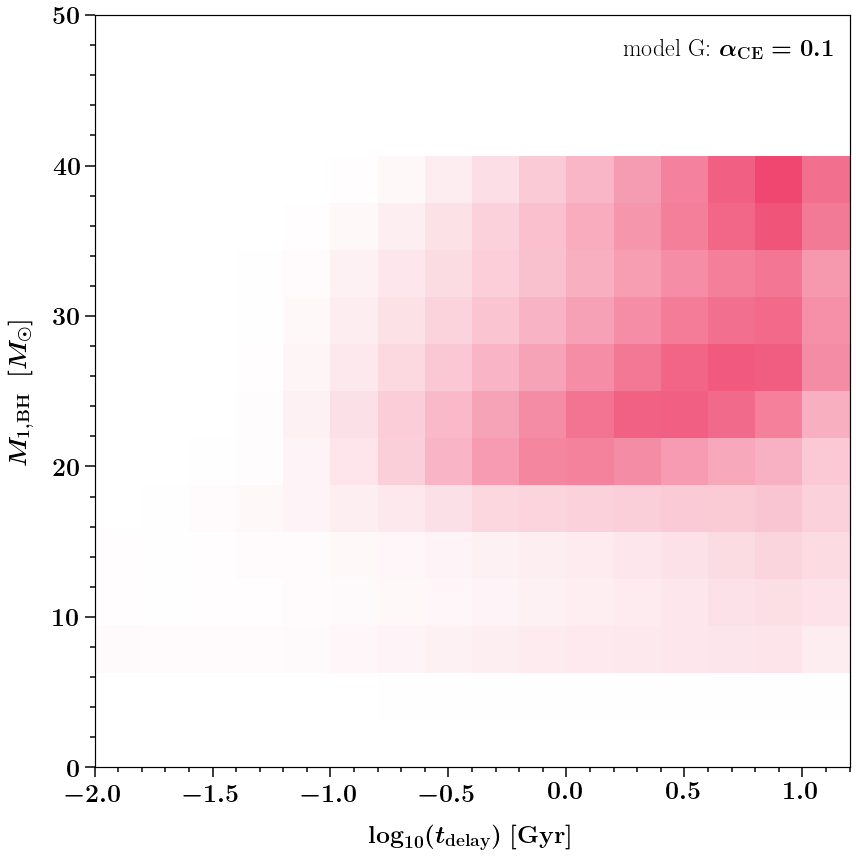

now at DCOtype BBH
channel = 1 model =  H
weighted mean t_delay = 1.1468486080663798 Gyr
weighted mean  log10 t_delay = -0.7872968109474395 Gyr
weighted median t_delay = 0.10199918468934721 Gyr
weighted median  log10 t_delay = -0.9914032996727534 Gyr


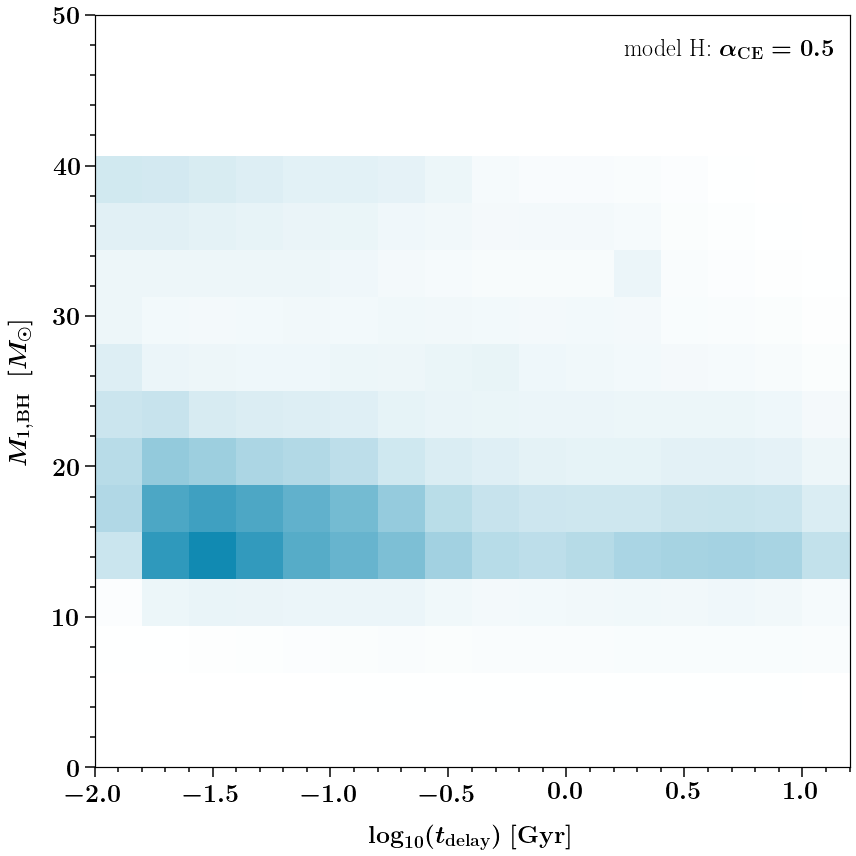

channel = 2 model =  H
weighted mean t_delay = 4.006234388829315 Gyr
weighted mean  log10 t_delay = 0.3302125676563127 Gyr
weighted median t_delay = 2.6564744605077966 Gyr
weighted median  log10 t_delay = 0.42430564493464934 Gyr


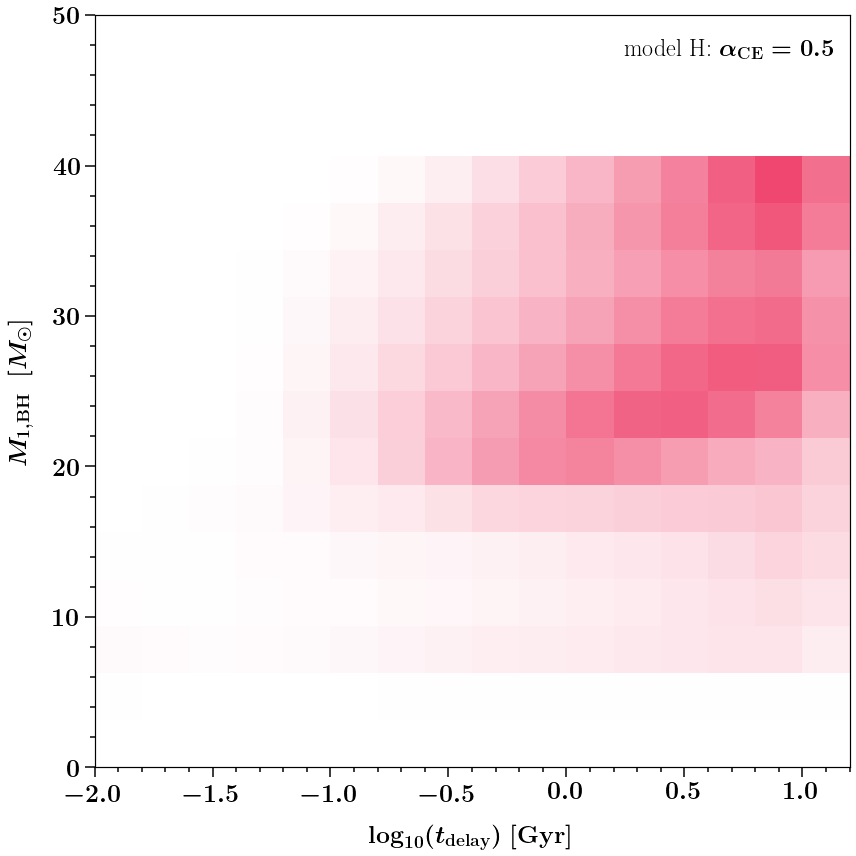

now at DCOtype BBH
channel = 1 model =  I
weighted mean t_delay = 2.2620508415971643 Gyr
weighted mean  log10 t_delay = -0.1263191974073788 Gyr
weighted median t_delay = 0.8113241412853863 Gyr
weighted median  log10 t_delay = -0.09080560121796466 Gyr


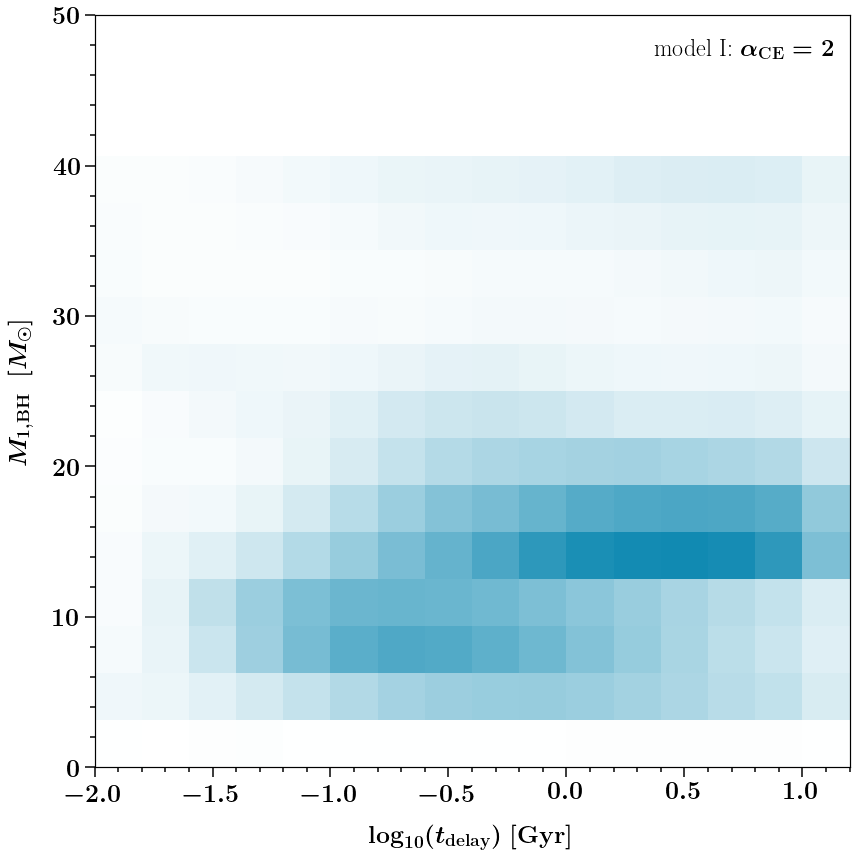

channel = 2 model =  I
weighted mean t_delay = 3.9988172852337525 Gyr
weighted mean  log10 t_delay = 0.32843265968475577 Gyr
weighted median t_delay = 2.646224828375842 Gyr
weighted median  log10 t_delay = 0.4226267399176088 Gyr


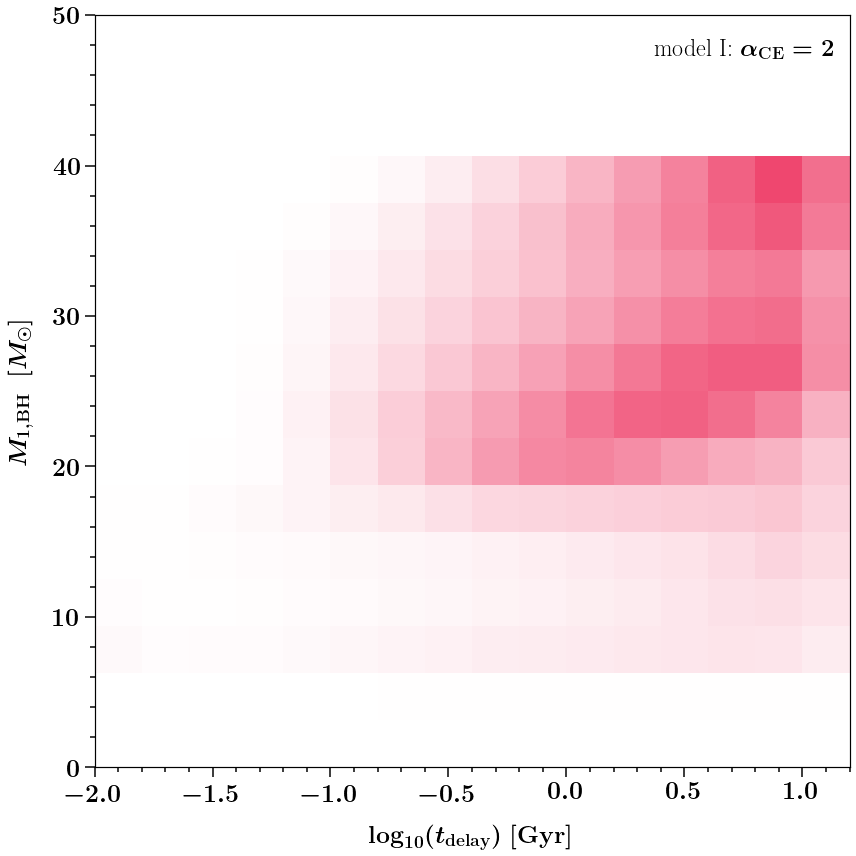

now at DCOtype BBH
channel = 1 model =  J
weighted mean t_delay = 4.236380705240334 Gyr
weighted mean  log10 t_delay = 0.25545146622972986 Gyr
weighted median t_delay = 2.8079473534800754 Gyr
weighted median  log10 t_delay = 0.44838896089696406 Gyr


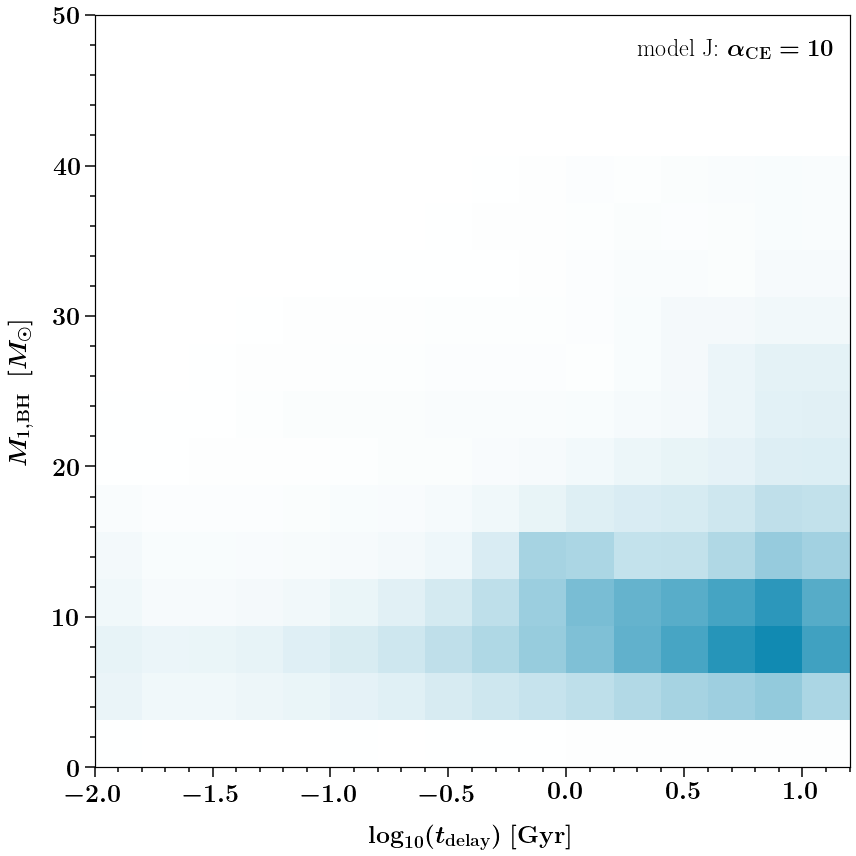

channel = 2 model =  J
weighted mean t_delay = 4.004790873635247 Gyr
weighted mean  log10 t_delay = 0.32905734148070054 Gyr
weighted median t_delay = 2.655183105203887 Gyr
weighted median  log10 t_delay = 0.42409447601532646 Gyr


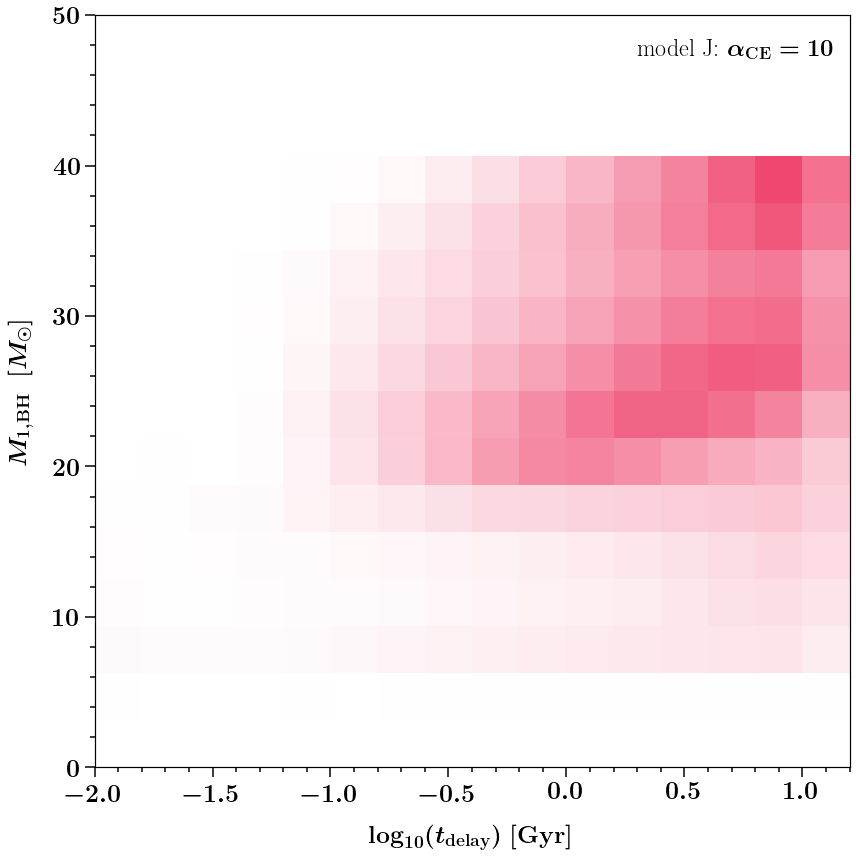

now at DCOtype BBH
channel = 1 model =  K
weighted mean t_delay = 1.1759546592065286 Gyr
weighted mean  log10 t_delay = -0.5563980590505029 Gyr
weighted median t_delay = 0.23591490947393512 Gyr
weighted median  log10 t_delay = -0.6272446114770781 Gyr


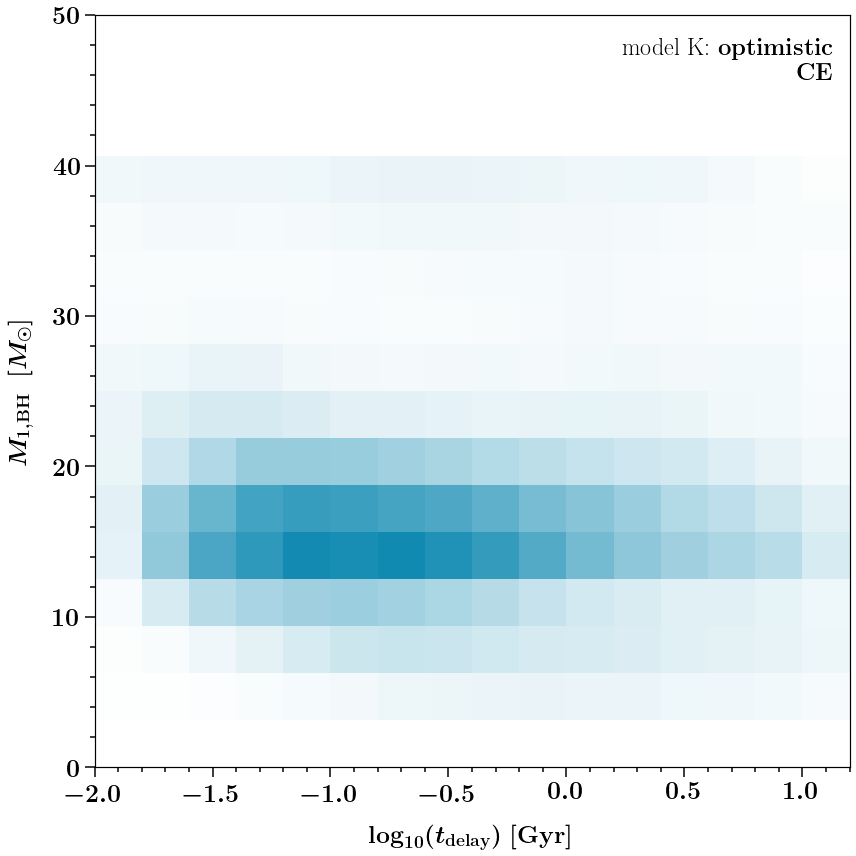

channel = 2 model =  K
weighted mean t_delay = 4.0034442246128155 Gyr
weighted mean  log10 t_delay = 0.3295873500009668 Gyr
weighted median t_delay = 2.649933969623248 Gyr
weighted median  log10 t_delay = 0.42323505243254295 Gyr


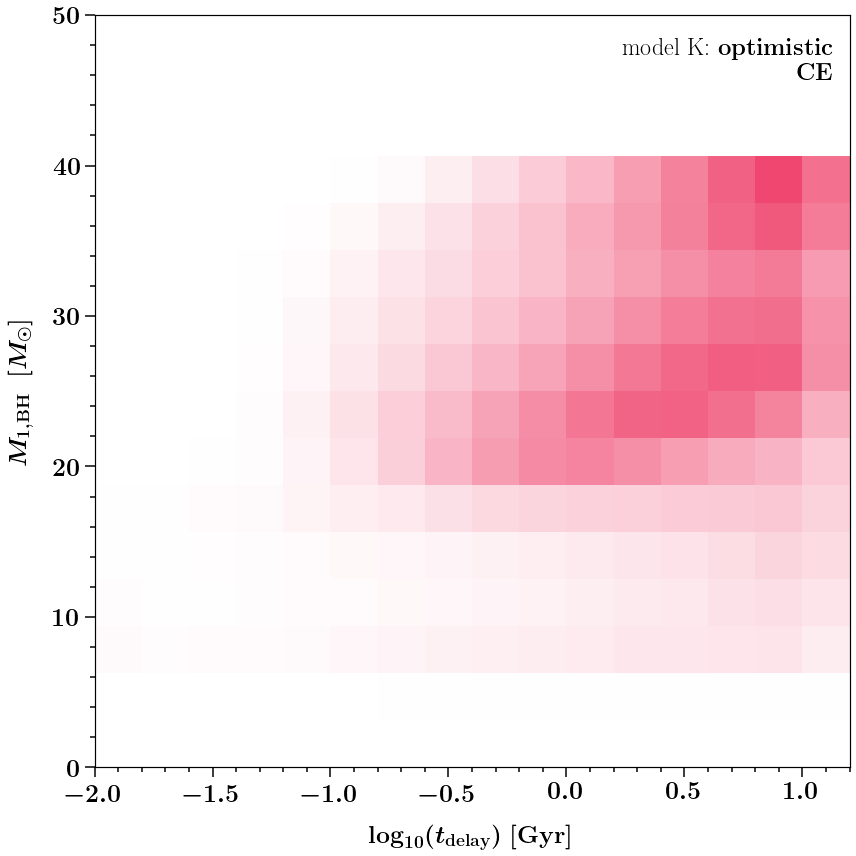

now at DCOtype BBH
channel = 1 model =  L
weighted mean t_delay = 1.02883266311856 Gyr
weighted mean  log10 t_delay = -0.6793557094601735 Gyr
weighted median t_delay = 0.1614658291682892 Gyr
weighted median  log10 t_delay = -0.791919372861368 Gyr


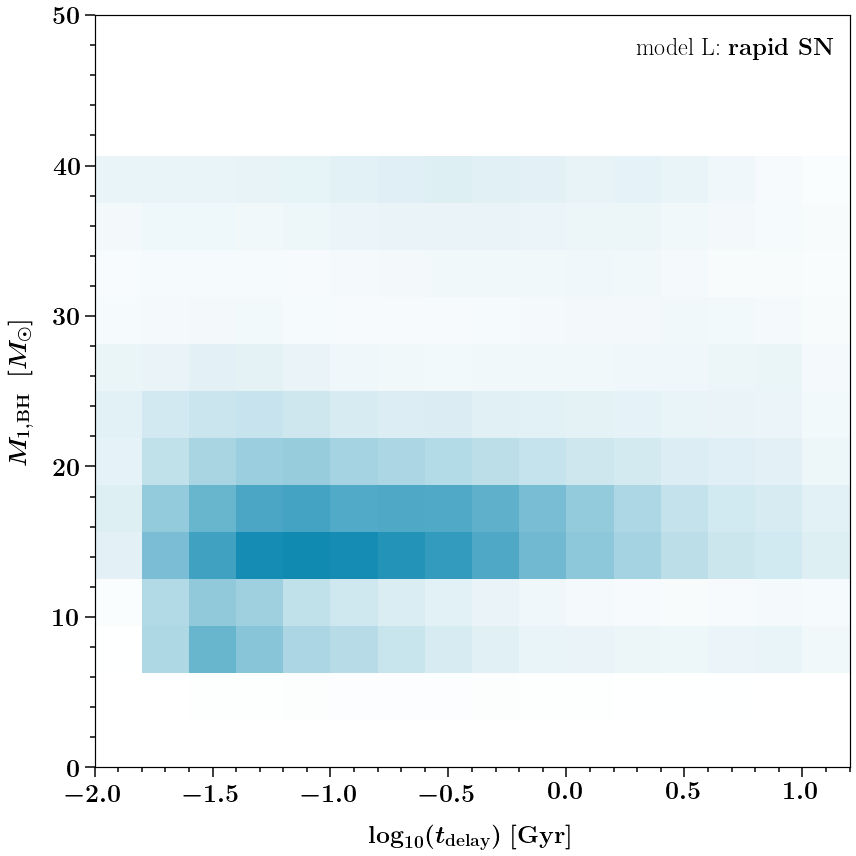

channel = 2 model =  L
weighted mean t_delay = 4.0498457357204405 Gyr
weighted mean  log10 t_delay = 0.34236907337374944 Gyr
weighted median t_delay = 2.7127018022445095 Gyr
weighted median  log10 t_delay = 0.43340205592243963 Gyr


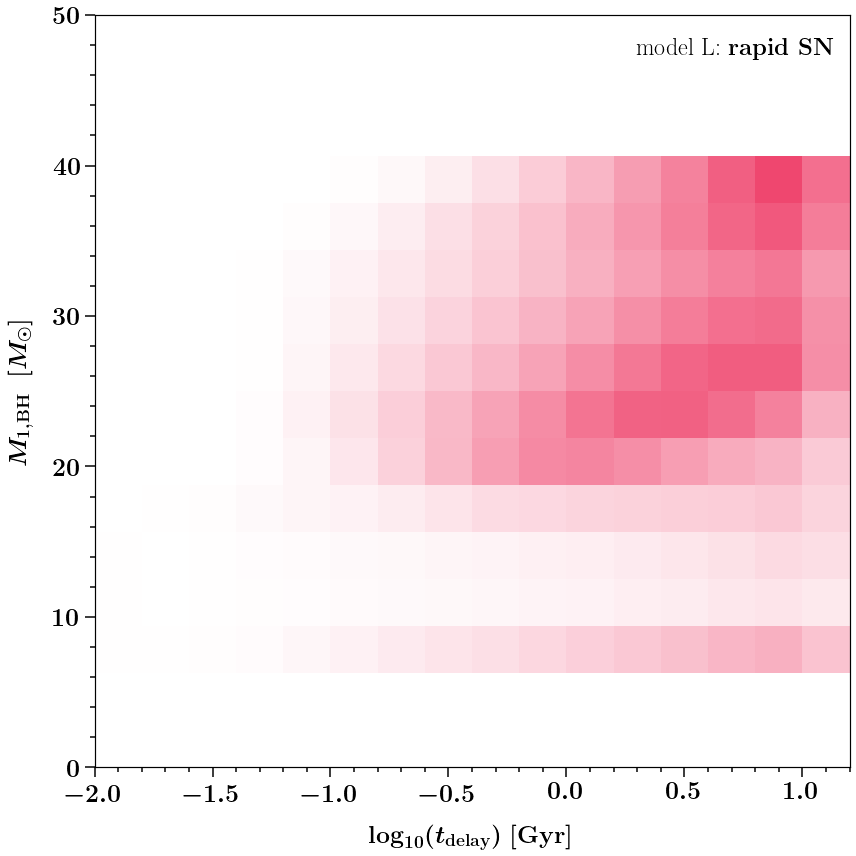

now at DCOtype BBH
channel = 1 model =  M
weighted mean t_delay = 1.1965430521227383 Gyr
weighted mean  log10 t_delay = -0.5599822198652986 Gyr
weighted median t_delay = 0.24630956306827861 Gyr
weighted median  log10 t_delay = -0.6085187261748793 Gyr


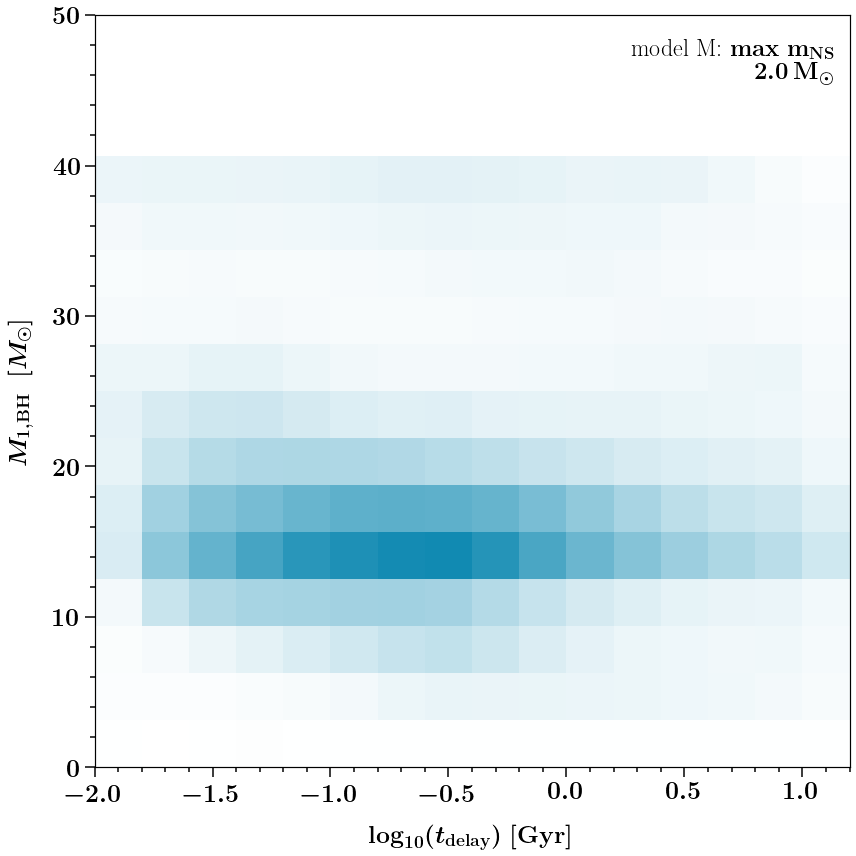

channel = 2 model =  M
weighted mean t_delay = 3.9952564556224033 Gyr
weighted mean  log10 t_delay = 0.3265874382385303 Gyr
weighted median t_delay = 2.645191263926582 Gyr
weighted median  log10 t_delay = 0.4224570797227177 Gyr


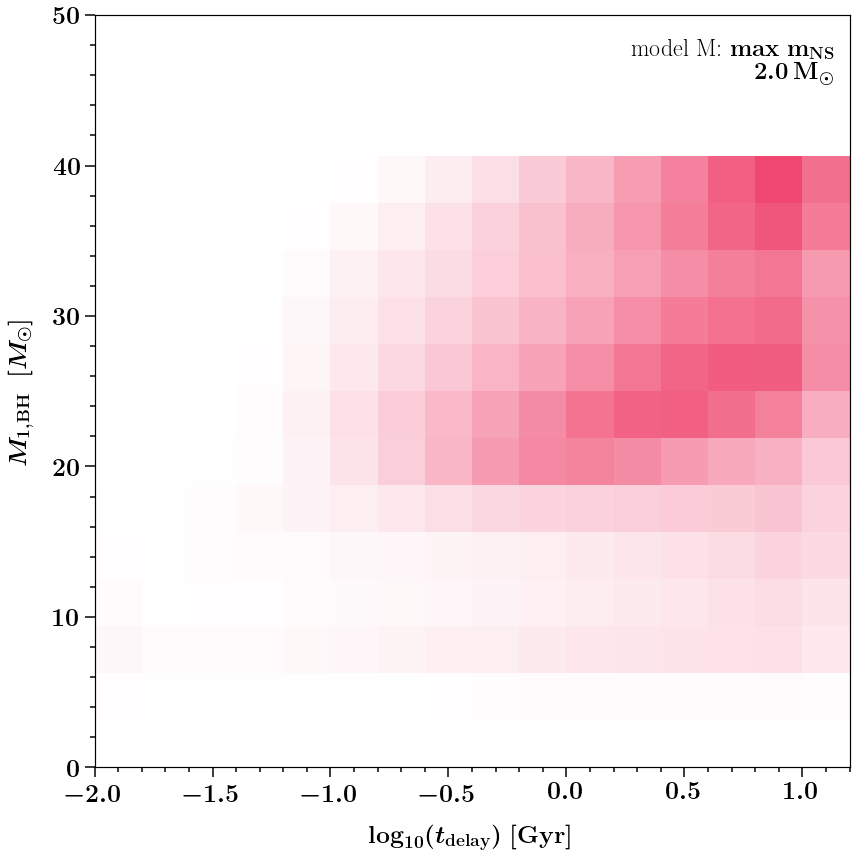

now at DCOtype BBH
channel = 1 model =  N
weighted mean t_delay = 1.1740169394654842 Gyr
weighted mean  log10 t_delay = -0.5949465212469583 Gyr
weighted median t_delay = 0.21334772571984623 Gyr
weighted median  log10 t_delay = -0.6709119823458464 Gyr


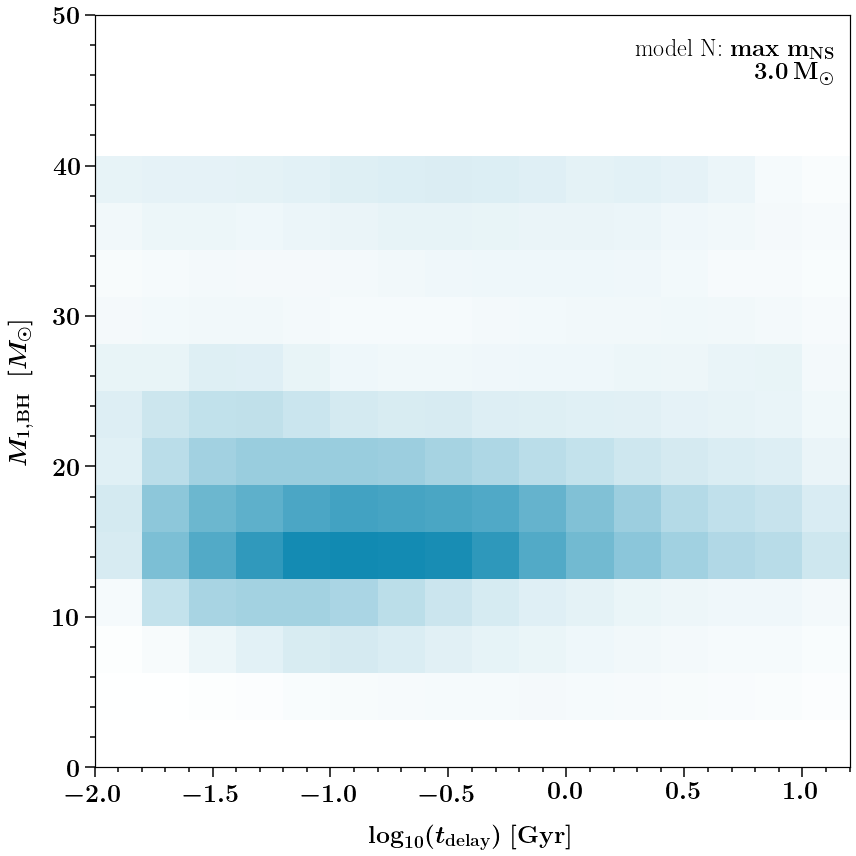

channel = 2 model =  N
weighted mean t_delay = 4.010264200785306 Gyr
weighted mean  log10 t_delay = 0.332654336221431 Gyr
weighted median t_delay = 2.6615613228111243 Gyr
weighted median  log10 t_delay = 0.4251364768404208 Gyr


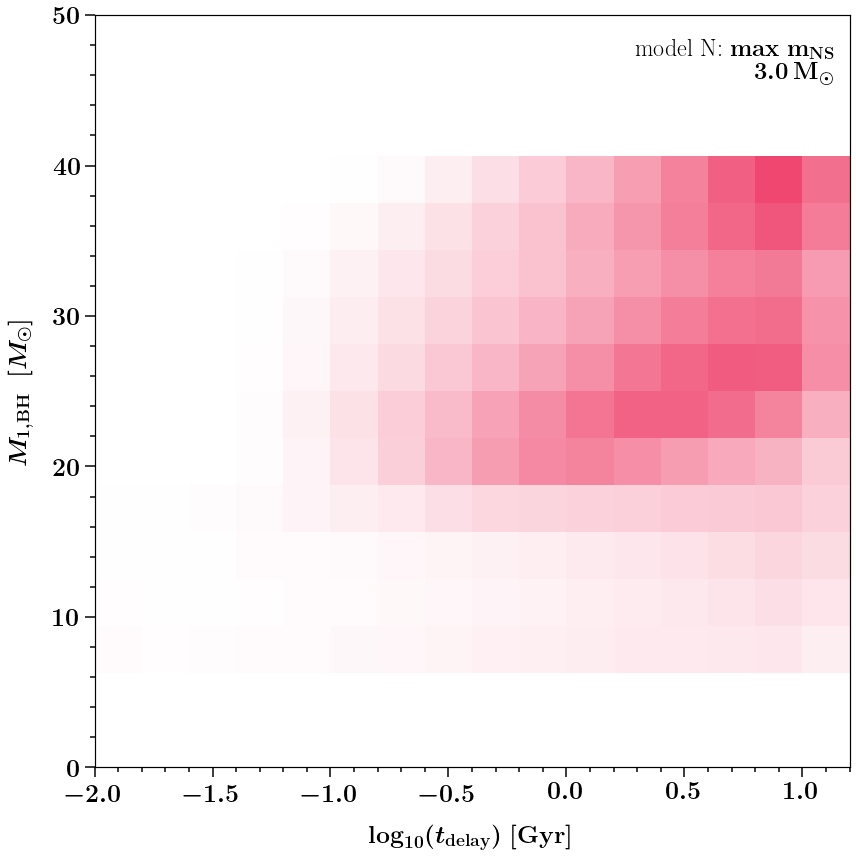

now at DCOtype BBH
channel = 1 model =  O
weighted mean t_delay = 1.1749149428333692 Gyr
weighted mean  log10 t_delay = -0.58735680422148 Gyr
weighted median t_delay = 0.21990317407376628 Gyr
weighted median  log10 t_delay = -0.6577685020045324 Gyr


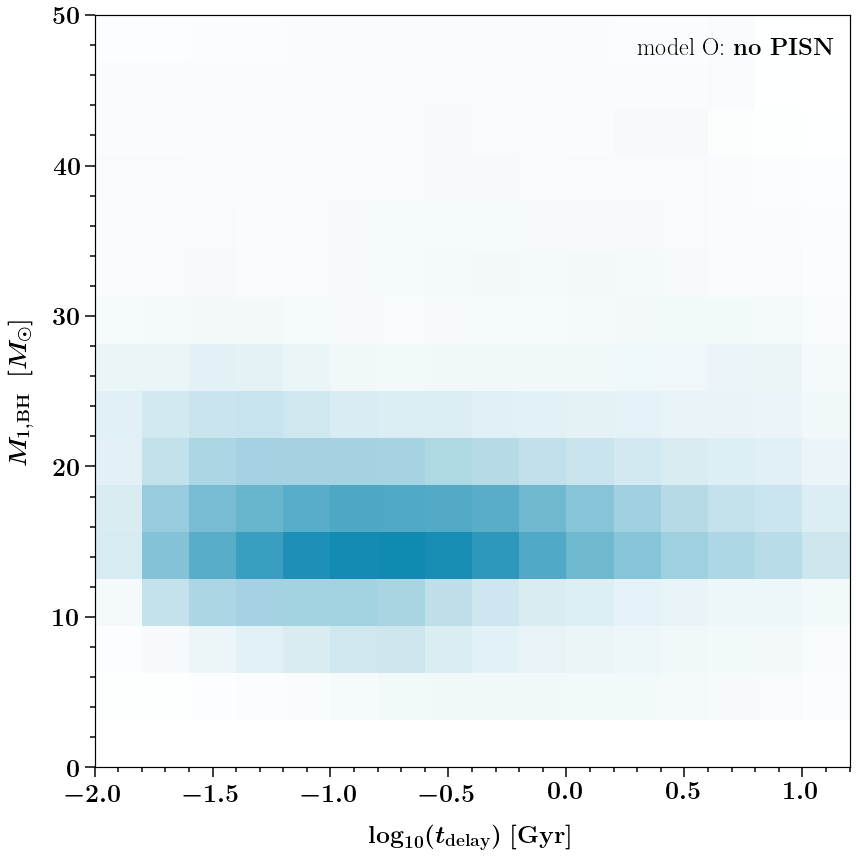

channel = 2 model =  O
weighted mean t_delay = 3.961085043464728 Gyr
weighted mean  log10 t_delay = 0.3249525058805653 Gyr
weighted median t_delay = 2.5965019018642836 Gyr
weighted median  log10 t_delay = 0.41438864503958195 Gyr


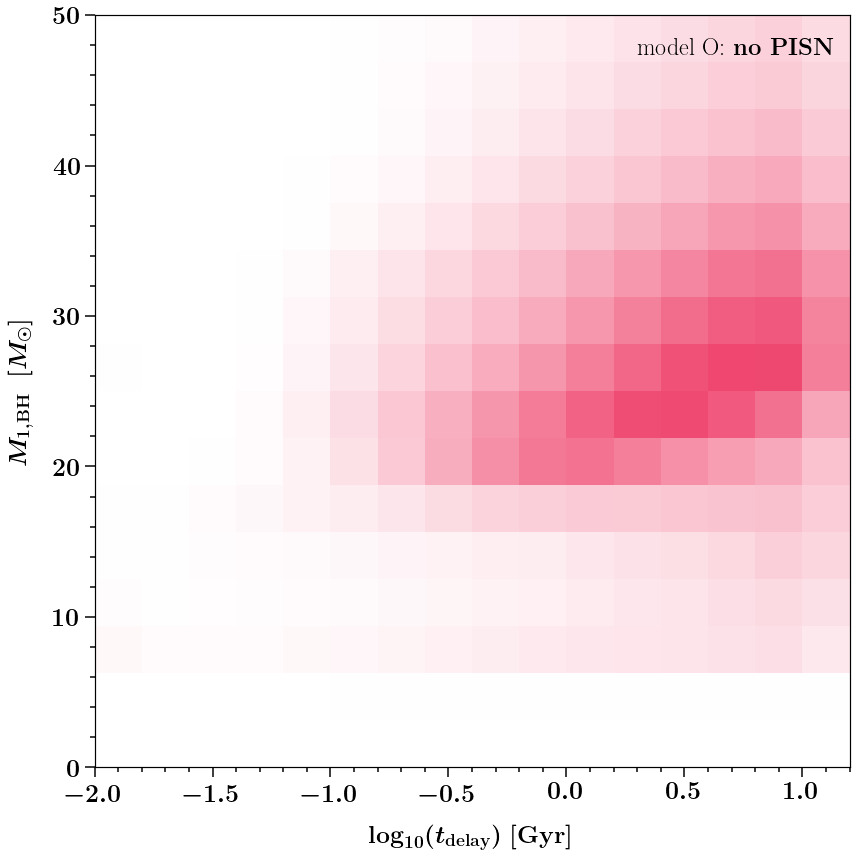

now at DCOtype BBH
channel = 1 model =  P
weighted mean t_delay = 1.1346506471571398 Gyr
weighted mean  log10 t_delay = -0.5456247007887582 Gyr
weighted median t_delay = 0.24345995182461694 Gyr
weighted median  log10 t_delay = -0.6135724682565274 Gyr


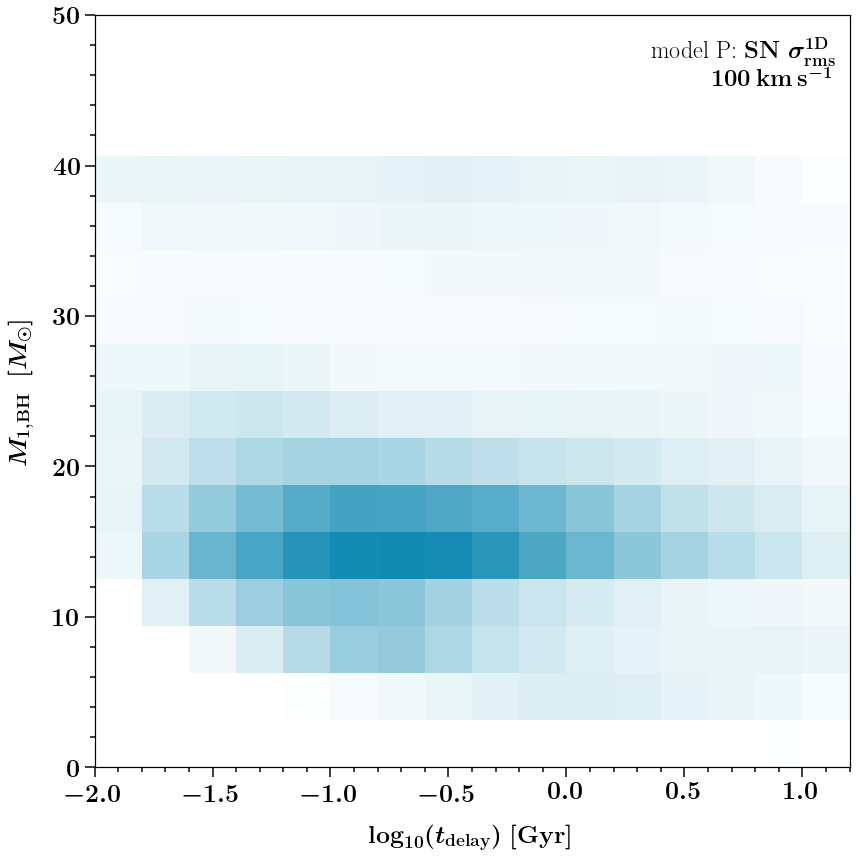

channel = 2 model =  P
weighted mean t_delay = 4.059500423947482 Gyr
weighted mean  log10 t_delay = 0.3482981982000657 Gyr
weighted median t_delay = 2.728171442095649 Gyr
weighted median  log10 t_delay = 0.4358716585124249 Gyr


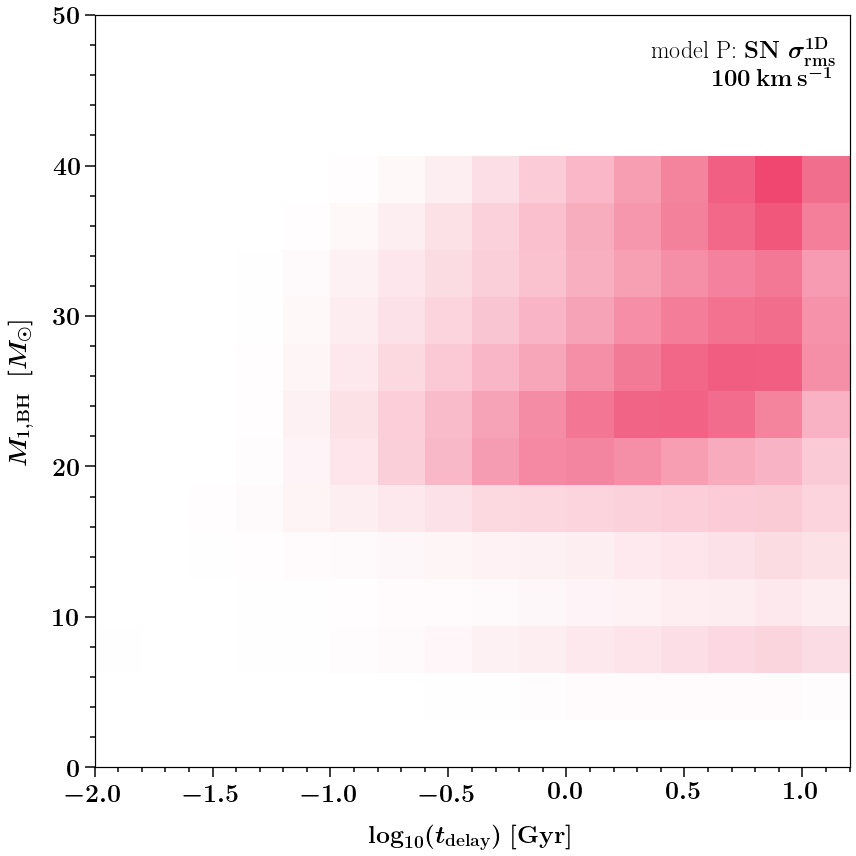

now at DCOtype BBH
channel = 1 model =  Q
weighted mean t_delay = 1.1224822240985703 Gyr
weighted mean  log10 t_delay = -0.5375968327122587 Gyr
weighted median t_delay = 0.2493135157975779 Gyr
weighted median  log10 t_delay = -0.6032541768624692 Gyr


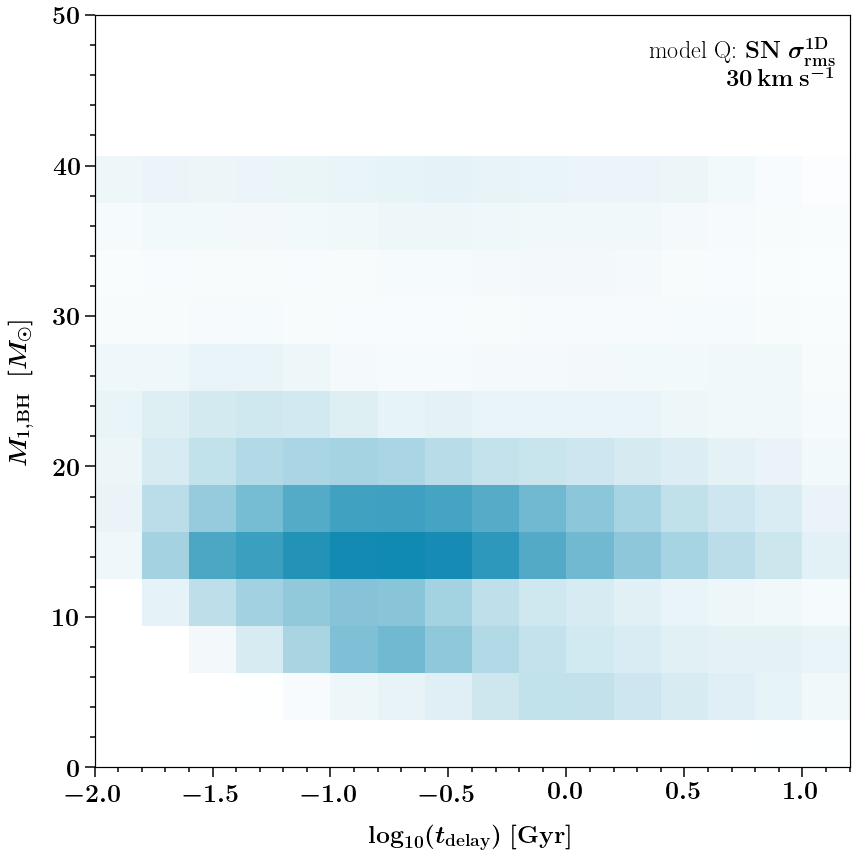

channel = 2 model =  Q
weighted mean t_delay = 4.067289170882687 Gyr
weighted mean  log10 t_delay = 0.35154159329512935 Gyr
weighted median t_delay = 2.7351814294626324 Gyr
weighted median  log10 t_delay = 0.43698613915242074 Gyr


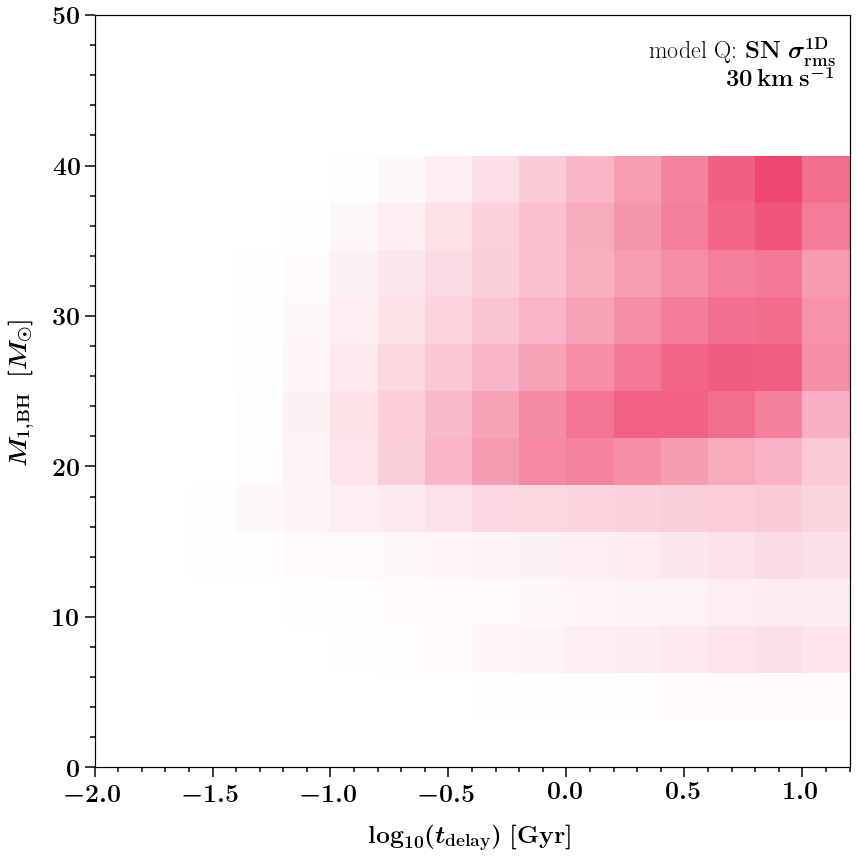

now at DCOtype BBH
channel = 1 model =  R
weighted mean t_delay = 1.1296842920712802 Gyr
weighted mean  log10 t_delay = -0.5363715490665196 Gyr
weighted median t_delay = 0.24927392655153668 Gyr
weighted median  log10 t_delay = -0.6033231452707194 Gyr


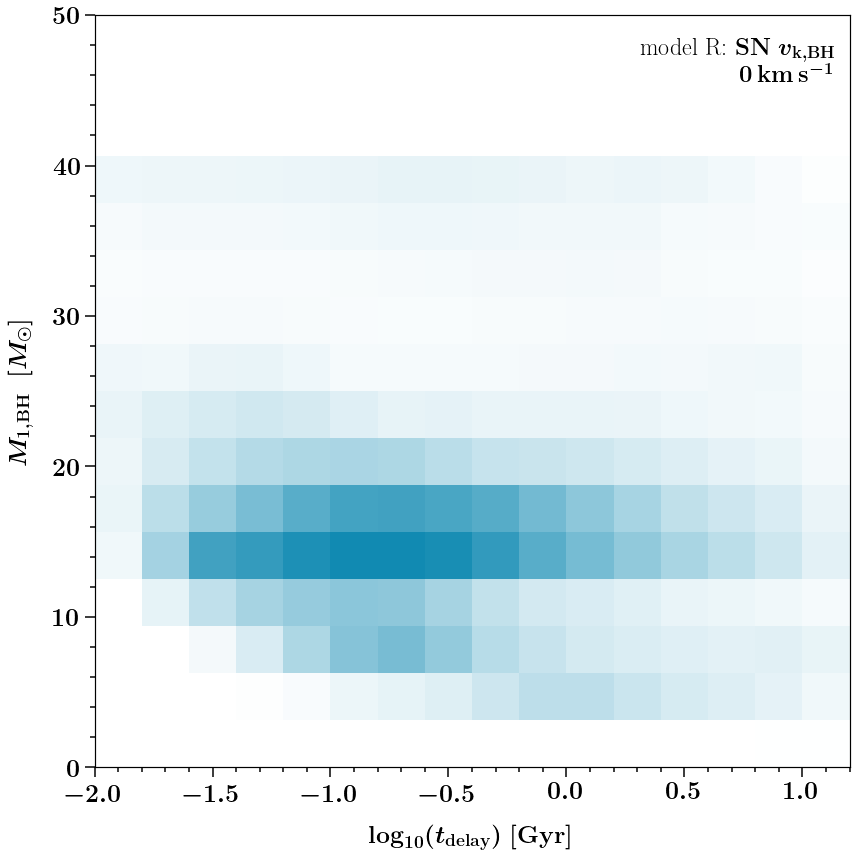

channel = 2 model =  R
weighted mean t_delay = 4.064336387027109 Gyr
weighted mean  log10 t_delay = 0.3513923028619771 Gyr
weighted median t_delay = 2.733431078000875 Gyr
weighted median  log10 t_delay = 0.4367081278629482 Gyr


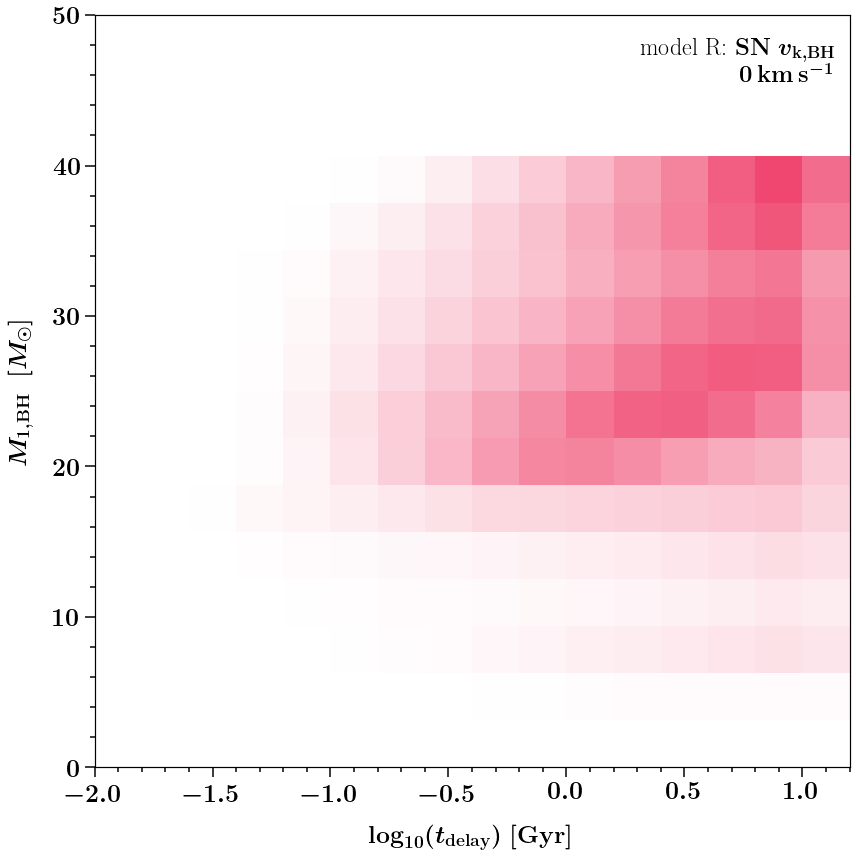

now at DCOtype BBH
channel = 1 model =  S
weighted mean t_delay = 1.1425880104416286 Gyr
weighted mean  log10 t_delay = -0.6079967157567245 Gyr
weighted median t_delay = 0.20693169836239914 Gyr
weighted median  log10 t_delay = -0.6841729778242013 Gyr


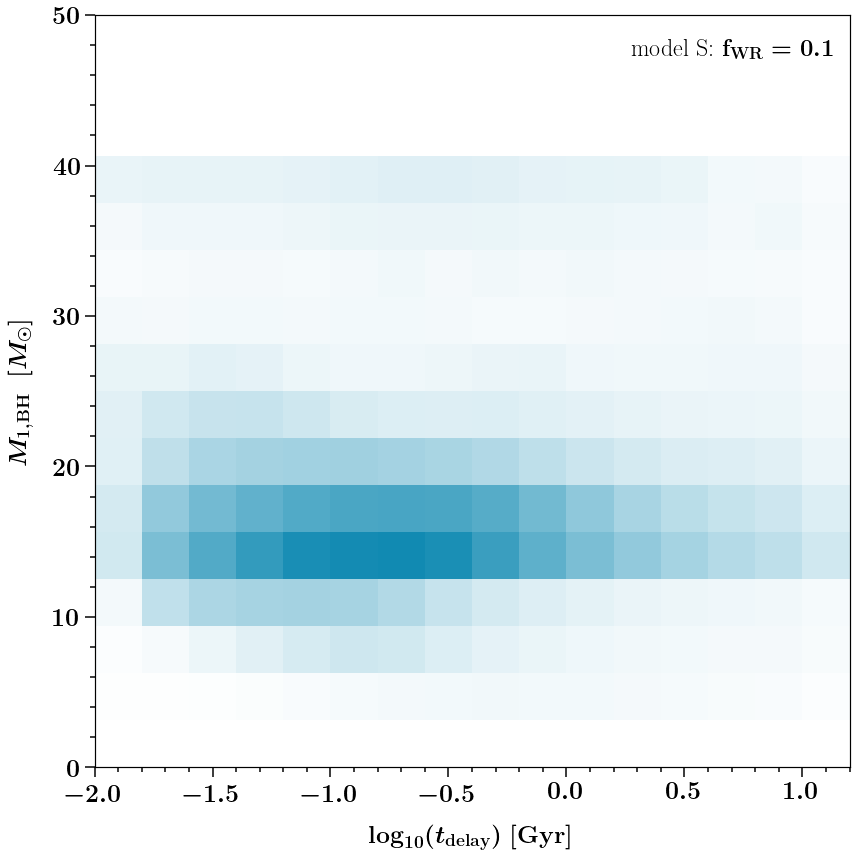

channel = 2 model =  S
weighted mean t_delay = 4.181851332609837 Gyr
weighted mean  log10 t_delay = 0.3532162025915607 Gyr
weighted median t_delay = 2.8679327404439294 Gyr
weighted median  log10 t_delay = 0.4575689619201809 Gyr


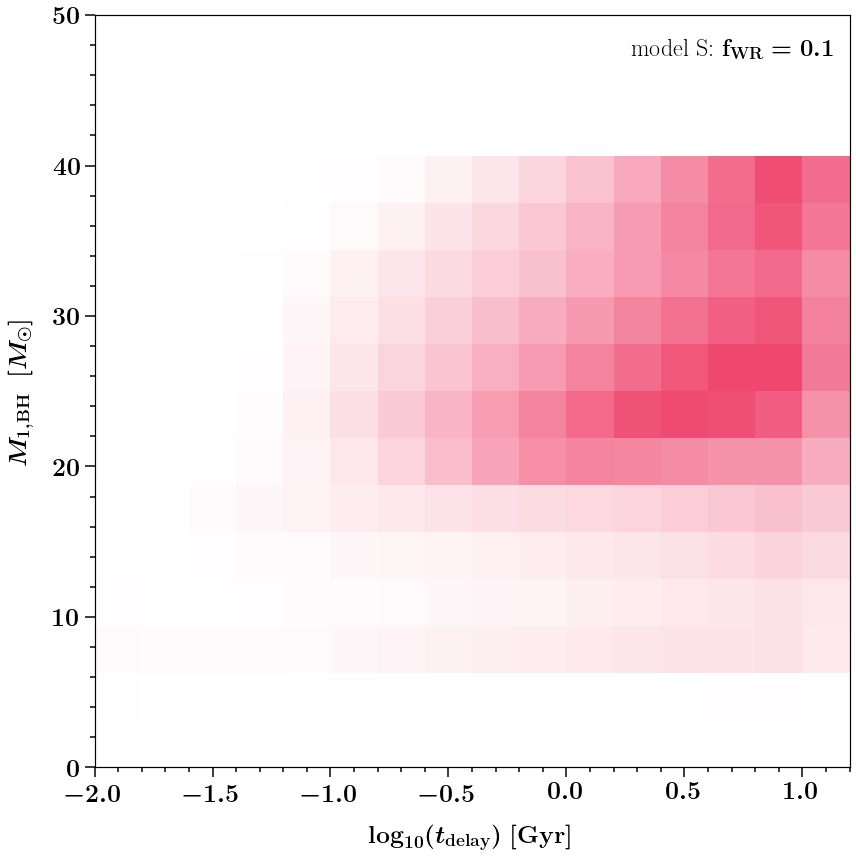

now at DCOtype BBH
channel = 1 model =  T
weighted mean t_delay = 1.283035810486408 Gyr
weighted mean  log10 t_delay = -0.5369233793278098 Gyr
weighted median t_delay = 0.2461633506558693 Gyr
weighted median  log10 t_delay = -0.6087766053149887 Gyr


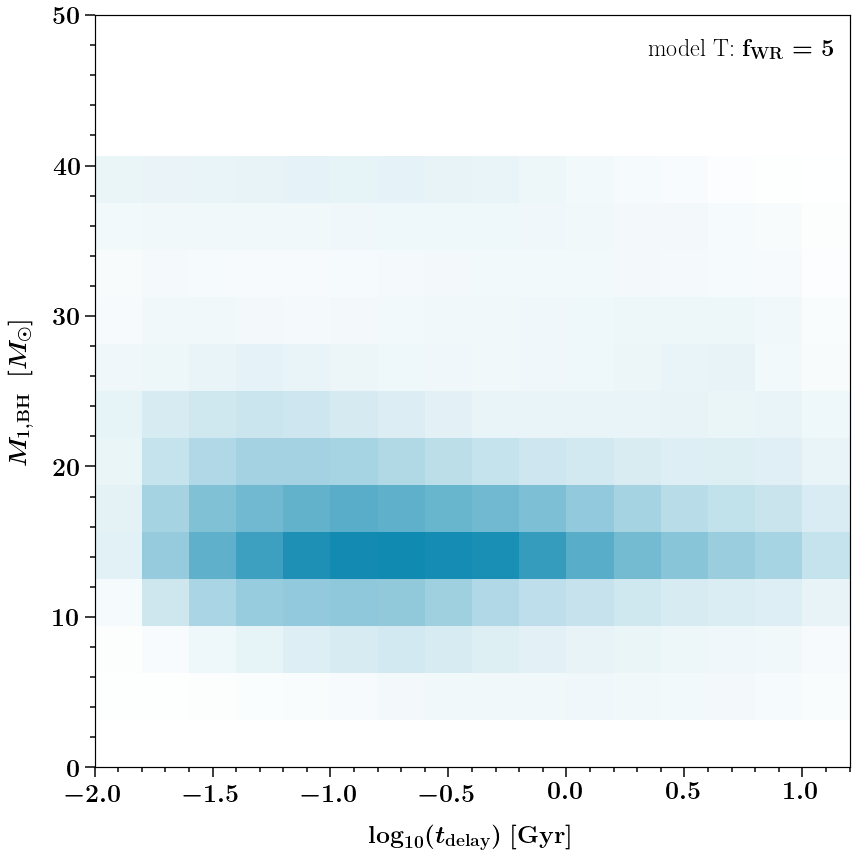

channel = 2 model =  T
weighted mean t_delay = 3.5016509241858484 Gyr
weighted mean  log10 t_delay = 0.24319414066238482 Gyr
weighted median t_delay = 2.0107072076225205 Gyr
weighted median  log10 t_delay = 0.30334883470832796 Gyr


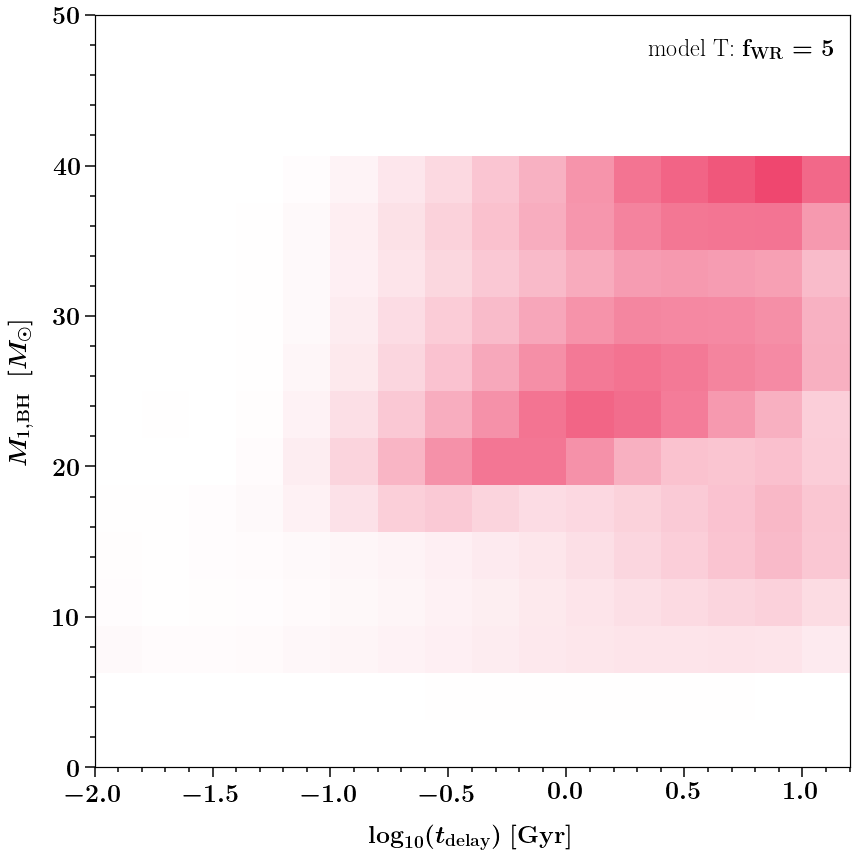

In [8]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial 
############
######
# for ind_bps, BPSmodelName in enumerate(BPSnameslist):
for ind_bps, BPSmodelName in enumerate(['A' , 'B', 'C', 'D', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T' ]):


    for ind_dco, DCOtype in enumerate(['BBH']):#, 'BNS', 'BHNS']):

        print('now at DCOtype %s'%DCOtype)

        #####
        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
        tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
        log10tdelay= np.log10((tc/1000) + (tform / 1000)) # in log10 and Gyr 
        del tc 
        del tform




        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 

        ### read in MSSFR weights: ###
        w = fdata['doubleCompactObjects']['weight'][...].squeeze()


        for ind_c, Channel in enumerate([1,2]):
            ncols=1
            nrows=1
            f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(12,12), 
                          gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


            channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  

            s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
            axes.text(0.98, 0.97, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')
            
            make_up_axes(axes=axes, ylim=[0, 50],  xlim=[-2, 1.2], ylabel=r'$M_{1,\rm{BH}} \ $ $[M_{\odot}]$', xlabel=r'$\log_{10}(t_{\rm{delay}}) \ [\rm{Gyr}]$', logX=False) 


            
            if Channel==1: # All channels with CE combined 
                mask_c  = (channels==Channel) | (channels==3)  | (channels==4) 
            elif Channel==2:
                mask_c  = (channels==Channel) 
                
            if np.sum(mask_c)>0:

                M1BH = M1[mask_c] # [Msun]
                log10tdelay_ = log10tdelay[mask_c] # [Gyr] 
                
                print('channel =',  Channel, 'model = ', BPSmodelName)
                print('weighted mean t_delay =', np.average(10**log10tdelay_, weights=w[mask_c]), 'Gyr')
                print('weighted mean  log10 t_delay =',  np.average(log10tdelay_, weights=w[mask_c]), 'Gyr')
                print('weighted median t_delay =', weighted_quantile(10**log10tdelay_, 0.5, sample_weight=w[mask_c]), 'Gyr')
                print('weighted median  log10 t_delay =',  weighted_quantile(log10tdelay_, 0.5, sample_weight=w[mask_c]), 'Gyr')
                
                
                cmapCustom = matplotlib.colors.LinearSegmentedColormap.from_list("", [   "white", channelColorDict[Channel]])
                axes.hist2d(log10tdelay_, M1BH,  bins=16, cmap=cmapCustom, zorder=1, range=[[-2, 1.2], [0, 50]], density=True, weights=w[mask_c] )
#                 axes.scatter(log10tdelay_, M1BH,   c=channelColorDict[Channel], zorder=1, s=0.2 )
    
#                 axes.hist(log10tdelay_, bins=30, lw=3, color=channelColorDict[Channel], density=True, weights=w[mask_c], histtype='step')
    #                 print('done')

            else:
                print('skip channel %s'%Channel)

            plt.tight_layout()
#             plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/vs_PsimulationWeighted_M1BH_logtdelay/Formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '_' + str(ind_c) + '.png', dpi=300, transparent=False)

    
            plt.show()
            plt.close()

    
    
    
    

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial 
############
######
# for ind_bps, BPSmodelName in enumerate(BPSnameslist):
for ind_bps, BPSmodelName in enumerate(['A', 'B', 'C', 'D', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T' ]):
    for ind_c, Channel in enumerate([1,2]):
        ncols=1
        nrows=1
        f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(12,12), 
                      gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


        channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  

        s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
        axes.text(0.98, 0.97, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')
    #     axes.set_ylim(-3, 1.2)
    #     plot_3Msun_lines(axes=axes, xlim=[2,400])
        make_up_axes(axes=axes, ylim=[0, 50],  xlim=[-3, 1.2], ylabel=r'$M_{1,\rm{BH}} \ $ $[M_{\odot}]$', xlabel=r'$\log_{10}(t_{\rm{delay}}) \ [\rm{Gyr}]$', logX=False) 
    #     plot_x_ticks(axe=axes) # has to go after make_up_axes 
        w_size=100
    #     add_GW_credible_intervals(axes=axes)
    #     for ind_dco, DCOtype in enumerate(['BNS']):
        for ind_dco, DCOtype in enumerate(['BBH']):#, 'BNS', 'BHNS']):

            print('now at DCOtype %s'%DCOtype)

            #####
            DCOname = DCOname_dict[DCOtype]

            # path for files 
            path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
            path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

            # read in data 
            fdata = h5.File(path)

            seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
            channels = identify_formation_channels(seeds=seeds, file=fdata)


            tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
            tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
            log10tdelay= np.log10((tc/1000) + (tform / 1000)) # in log10 and Gyr 
            del tc 
            del tform




            # M1 will be the most massive, M2 the least massive compact object. 
            M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
            #     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])



            ### read in MSSFR weights: ###
            w = fdata['doubleCompactObjects']['weight'][...].squeeze()
        
#             mssfr = '312' # mssfr that matches LIGO observed rates.
#             # get detected weights
#             fparam_key = 'weights_detected'
#             weightheader = 'w_' + mssfr
#             w = fdata[fparam_key][weightheader][...].squeeze()

            # pick per DCO N (size_boot) representative samples, based on Detectable weights 
            size_boot = len(seeds)
            boot_index = np.arange(len(seeds))
            boot_randindex = np.random.choice(boot_index, size=size_boot, replace=True, p=w/np.sum(w))  # prob needs to be normalized  




            mask_c  = (channels[boot_randindex]==Channel) 
            if Channel==1:
                mask_c  = (channels[boot_randindex]==Channel) | (channels[boot_randindex]==3)  | (channels[boot_randindex]==4) 
            if np.sum(mask_c)>0:

                M1BH_ = M1[boot_randindex][mask_c] #+ M2[boot_randindex][mask_c] 
                log10tdelay_ = log10tdelay[boot_randindex][mask_c] 

                cmapCustom = matplotlib.colors.LinearSegmentedColormap.from_list("", [   "white", channelColorDict[Channel]])
                plt.hist2d(log10tdelay_, M1BH_,  bins=16, cmap=cmapCustom, zorder=1, range=[[-2, 1.2], [0, 50]], density=True, weights=w[boot_randindex][mask_c] )
    #                 print('done')

            else:
                print('skip channel %s'%Channel)

            plt.tight_layout()
            plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/vs_PsimulationWeighted_M1BH_logtdelay/Formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '_' + str(ind_c) + '.png', dpi=300, transparent=False)

    
    plt.show()
    plt.close()
    
    
    
    
    

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial 
############
######
# for ind_bps, BPSmodelName in enumerate(BPSnameslist):
for ind_bps, BPSmodelName in enumerate(['A', 'B', 'C', 'D', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T' ]):
    for ind_c, Channel in enumerate([1,2]):
        ncols=1
        nrows=1
        f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(12,12), 
                      gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


        channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  

        s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
        axes.text(0.98, 0.97, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')
    #     axes.set_ylim(-3, 1.2)
    #     plot_3Msun_lines(axes=axes, xlim=[2,400])
        make_up_axes(axes=axes, ylim=[0, 50],  xlim=[-3, 1.2], ylabel=r'$M_{1,\rm{BH}} \ $ $[M_{\odot}]$', xlabel=r'$\log_{10}(t_{\rm{delay}}) \ [\rm{Gyr}]$', logX=False) 
    #     plot_x_ticks(axe=axes) # has to go after make_up_axes 
        w_size=100
    #     add_GW_credible_intervals(axes=axes)
    #     for ind_dco, DCOtype in enumerate(['BNS']):
        for ind_dco, DCOtype in enumerate(['BBH']):#, 'BNS', 'BHNS']):

            print('now at DCOtype %s'%DCOtype)

            #####
            DCOname = DCOname_dict[DCOtype]

            # path for files 
            path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
            path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

            # read in data 
            fdata = h5.File(path)

            seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
            channels = identify_formation_channels(seeds=seeds, file=fdata)


            tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
            tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
            log10tdelay= np.log10((tc/1000) + (tform / 1000)) # in log10 and Gyr 
            del tc 
            del tform




            # M1 will be the most massive, M2 the least massive compact object. 
            M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
            #     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])



            ### read in MSSFR weights: ###
            mssfr = '312' # mssfr that matches LIGO observed rates.
            # get detected weights
            fparam_key = 'weights_detected'
            weightheader = 'w_' + mssfr
            w = fdata['doubleCompactObjects']['weight'][...].squeeze()

            # pick per DCO N (size_boot) representative samples, based on Detectable weights 
            size_boot = 5000
            boot_index = np.arange(len(seeds))
            boot_randindex = np.random.choice(boot_index, size=size_boot, replace=True, p=w/np.sum(w))  # prob needs to be normalized  




            mask_c  = (channels[boot_randindex]==Channel) 
            if Channel==1:
                mask_c  = (channels[boot_randindex]==Channel) | (channels[boot_randindex]==3)  | (channels[boot_randindex]==4) 
            if np.sum(mask_c)>0:

                M1BH_ = M1[boot_randindex][mask_c] #+ M2[boot_randindex][mask_c] 
                log10tdelay_ = log10tdelay[boot_randindex][mask_c] 

                cmapCustom = matplotlib.colors.LinearSegmentedColormap.from_list("", [   "white", channelColorDict[Channel]])
                plt.hist2d(log10tdelay_, M1BH_,  bins=16, cmap=cmapCustom, zorder=1, range=[[-2, 1.2], [0, 50]], density=True, weights=w[boot_randindex][mask_c] )
    #                 print('done')

            else:
                print('skip channel %s'%Channel)

            plt.tight_layout()
            plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/vs_PsimulationWeighted_M1BH_logtdelay/Formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '_' + str(ind_c) + '_DetectorWeighted_.png', dpi=300, transparent=False)

    
    plt.show()
    plt.close()
    
    
    
    
    

# OTHER

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial 
############
######
# for ind_bps, BPSmodelName in enumerate(BPSnameslist):
for ind_bps, BPSmodelName in enumerate(['A', 'B', 'C', 'D', 'G', 'H', 'I', 'J' ]):
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  

    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.98, 0.97, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')
#     axes.set_ylim(-3, 1.2)
#     plot_3Msun_lines(axes=axes, xlim=[2,400])
    make_up_axes(axes=axes, ylim=[0, 50],  xlim=[-3, 1.2], ylabel=r'M1BH $[M_{\odot}]$', xlabel=r'$\log_{10}(t_{\rm{delay}}) \ [\rm{Gyr}]$', logX=False) 
#     plot_x_ticks(axe=axes) # has to go after make_up_axes 
    w_size=100
#     add_GW_credible_intervals(axes=axes)
#     for ind_dco, DCOtype in enumerate(['BNS']):
    for ind_dco, DCOtype in enumerate(['BBH']):#, 'BNS', 'BHNS']):

        print('now at DCOtype %s'%DCOtype)

        #####
        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)
        

        tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
        tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
        log10tdelay= np.log10((tc/1000) + (tform / 1000)) # in log10 and Gyr 
        del tc 
        del tform
        
        
        

        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
        #     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])

        
        
        ### read in MSSFR weights: ###
        mssfr = '312' # mssfr that matches LIGO observed rates.
        # get detected weights
#         fparam_key = 'weights_detected'
#         weightheader = 'w_' + mssfr
        w = fdata['doubleCompactObjects']['weight'][...].squeeze()
        
        # pick per DCO N (size_boot) representative samples, based on Detectable weights 
        size_boot = 5000
        boot_index = np.arange(len(seeds))
        boot_randindex = np.random.choice(boot_index, size=size_boot, replace=True, p=w/np.sum(w))  # prob needs to be normalized  
        

        for ind_c, Channel in enumerate([1,2]): #,2,3,4]):

            mask_c  = (channels[boot_randindex]==Channel)
            if np.sum(mask_c)>0:

                M1BH_ = M1[boot_randindex][mask_c] #+ M2[boot_randindex][mask_c] 
                log10tdelay_ = log10tdelay[boot_randindex][mask_c] 
#                 massRatio = M2[boot_randindex][mask_c]/M1[boot_randindex][mask_c]
#                 print()
#                 print(len(np.random.choice([1,2,3,4,5], size=len(Mtot))))
#                 print(((np.random.choice([1,2,3,4,5], size=len(Mtot)))))
#                 zorder = (np.random.choice([1,2,3,4,5], size=len(Mtot)))
                plt.scatter(log10tdelay_, M1BH_,   c=channelColorDict[Channel], s=7, alpha=1, zorder=1)
#                 print('done')

            else:
                print('skip channel %s'%Channel)

        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/vs_PsimulationWeighted_M1BH_logtdelay/Formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)
    
    
    plt.show()
    plt.close()

# DETECTOR WEIGHTED TOT MASS vs q 

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial 
############
######
# for ind_bps, BPSmodelName in enumerate(BPSnameslist):
for ind_bps, BPSmodelName in enumerate(['A']):
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  

    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.98, 0.97, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    plot_3Msun_lines(axes=axes, xlim=[2,400])
    make_up_axes(axes=axes) 
    plot_x_ticks(axe=axes) # has to go after make_up_axes 
    w_size=100
#     add_GW_credible_intervals(axes=axes)
#     for ind_dco, DCOtype in enumerate(['BNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####
        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)
        

        
        
        

        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
        #     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])

        
        
        ### read in MSSFR weights: ###
        mssfr = '312' # mssfr that matches LIGO observed rates.
        # get detected weights
        fparam_key = 'weights_detected'
        weightheader = 'w_' + mssfr
        w = fdata[fparam_key][weightheader][...].squeeze()
        
        # pick per DCO N (size_boot) representative samples, based on Detectable weights 
        size_boot = 5000
        boot_index = np.arange(len(seeds))
        boot_randindex = np.random.choice(boot_index, size=size_boot, replace=True, p=w/np.sum(w))  # prob needs to be normalized  
        

        for ind_c, Channel in enumerate([0,1,2,3,4]):

            mask_c  = (channels[boot_randindex]==Channel) 
            if np.sum(mask_c)>0:

                Mtot = M1[boot_randindex][mask_c] + M2[boot_randindex][mask_c] 
                massRatio = M2[boot_randindex][mask_c]/M1[boot_randindex][mask_c]
#                 print()
#                 print(len(np.random.choice([1,2,3,4,5], size=len(Mtot))))
#                 print(((np.random.choice([1,2,3,4,5], size=len(Mtot)))))
#                 zorder = (np.random.choice([1,2,3,4,5], size=len(Mtot)))
                plt.scatter(Mtot, massRatio,  c=channelColorDict[Channel], s=7, alpha=1, zorder=1)
#                 print('done')

            else:
                print('skip channel %s'%Channel)

        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/vs_PdetWeighted_Mtot_q/Formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)
    
    
    plt.show()
    plt.close()

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial 
############
######
# for ind_bps, BPSmodelName in enumerate(BPSnameslist):
for ind_bps, BPSmodelName in enumerate(['A']):
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  

    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.98, 0.97, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

#     make_up_axes(axes=axes, xlim=[2,400], ylim=[0,14], xlabel=r'Total mass $[M_{\odot}]$', ylabel=r'$t_{\rm{delay}}$', logX=True) 
#     plot_x_ticks(axe=axes, xlim=[2,400], ylim=[0,14], ytick_loc=[2.5, 5, 7.5, 10, 12.5]) # has to go after make_up_axes 
    
    make_up_axes(axes=axes, xlim=[2,400], ylim=[0.001,14], xlabel=r'Total mass $[M_{\odot}]$', ylabel=r'$t_{\rm{delay}}$', logX=True, logY=True) 
    plot_x_ticks(axe=axes, xlim=[2,400], ylim=[0.001,14], ytick_loc=[0.01, 0.1, 1, 10]) # has to go after make_up_axes     
    
    w_size=100
    
#     for ind_dco, DCOtype in enumerate(['BNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####
        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/' + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)
        

        
        
        

        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
        #     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])

        tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
        tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
        tdelay= (tc/1000) + (tform / 1000) # in Gyr 
        del tc 
        del tform
        
        
        ### read in MSSFR weights: ###
        mssfr = '312' # mssfr that matches LIGO observed rates.
        # get detected weights
        fparam_key = 'weights_detected'
        weightheader = 'w_' + mssfr
        w = fdata[fparam_key][weightheader][...].squeeze()
        
        # pick per DCO N (size_boot) representative samples, based on Detectable weights 
        size_boot = 1000
        boot_index = np.arange(len(seeds))
        boot_randindex = np.random.choice(boot_index, size=size_boot, replace=True, p=w/np.sum(w))  # prob needs to be normalized  
        

        for ind_c, Channel in enumerate([0,1,2,3,4]):

            mask_c  = (channels[boot_randindex]==Channel) 
            if np.sum(mask_c)>0:

                Mtot = M1[boot_randindex][mask_c] + M2[boot_randindex][mask_c] 
                Tdelay = tdelay[boot_randindex][mask_c]

                plt.scatter(Mtot, Tdelay, c=channelColorDict[Channel], zorder=np.random.choice([1,2,3,4,5], size=1), s=20, alpha=1)

            else:
                print('skip channel %s'%Channel)

        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/vs_PdetWeighted_Mtot_tdelay/Formation_channel_PdetTdelay' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)
    
    
    plt.show()
    plt.close()

In [ ]:
xvalues = (np.random.choice(range(10000), size=300))
yvalues = (np.random.choice(range(10000), size=300))

plt.scatter(xvalues, yvalues)
plt.show()

In [ ]:
try:
    from astropy.convolution import Gaussian2DKernel, convolve
    astro_smooth = True
except ImportError as IE:
    astro_smooth = False
print(astro_smooth)
import matplotlib

import matplotlib as mpl

In [ ]:
ncols=1
nrows=1
f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,12), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


cmapCustom = matplotlib.colors.LinearSegmentedColormap.from_list("", [   "white", 'b'])
Nbinsx, Nbinsy = 4, 4 
Range = [[0,10000], [0,10000]]
# use 2D hist to obtain density of samples over range. 
H, xedges, yedges = np.histogram2d(xvalues,yvalues, bins=(Nbinsx,Nbinsy), range = Range)
xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])


# Smooth the contours (if astropy is installed)
if astro_smooth:
    kernel = Gaussian2DKernel(x_stddev=.8, y_stddev=0.8)
    H=convolve(H,kernel)
    print(np.log10(np.max(H.T))   )
    #max density in highest contour
    maxLevel = 2
    minLevel = 0.0001
    
Levels = np.logspace(minLevel, maxLevel, 8)    
cmapping = axes.contourf(xmesh,ymesh,H.T,lw=.9,cmap=cmapCustom, levels = Levels, linewidths= 1.75, norm= mpl.colors.LogNorm(vmin=np.min(Levels),vmax=np.max(Levels)), alpha = 1)#,zorder=90)
axes.contourf(xmesh,ymesh,H.T,cmap=cmapCustom, levels = Levels, linewidths= 1.75, norm= mpl.colors.LogNorm(vmin=np.min(Levels),vmax=np.max(Levels)), alpha = 1)#,zorder=90)


In [ ]:




def calculate_credible_GW_intervals(GW_list=['GW190408_181802'], dfCSVname='/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation-/GW_credible_intervals/'):
    
    # the quantiles we want to obtain, here: the median & 90% credible interval
    # so we want quantiles 0.05, 0.5 and 0.95
    y_quantiles  =  [0.05,   0.5,    0.95]   
    indexnames   = ['unit',  '0.05',  '0.5',  '0.95']
    
    # prepare DataFrame 
    xvarHeaders = ['Mass1', 'Mass2', \
                    'TotMass', 'ChirpMass', 'q', 'spin1', 'spin2', 'final_spin', 'final_mass_source' ]

    xvarUnits = ['Msun', 'Msun', 'Msun', 'Msun', '#', '#', '#', '#', 'Msun']
    
    # ALL GWTC per catalog 
    GWTC1_BNS = ['GW170817']
    GWTC1 = ['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729',  'GW170809', 'GW170814', 'GW170817',  'GW170818', 'GW170823']
    GWTC2 = ['GW190408_181802','GW190412','GW190413_052954','GW190413_134308','GW190421_213856',\
    'GW190424_180648','GW190503_185404','GW190512_180714',\
    'GW190513_205428','GW190514_065416','GW190517_055101','GW190519_153544','GW190521_074359',\
    'GW190521','GW190527_092055','GW190602_175927','GW190620_030421','GW190630_185205','GW190701_203306',\
    'GW190706_222641','GW190707_093326','GW190708_232457','GW190720_000836',\
    'GW190727_060333','GW190728_064510','GW190731_140936','GW190803_022701','GW190828_063405',\
    'GW190828_065509','GW190910_112807','GW190915_235702','GW190924_021846','GW190929_012149',\
     'GW190930_133541', 'GW190425', 'GW190814', 'GW190426_152155']
    
    
    
    
    for GW in GW_list:
        GW_ = str(GW)
        if GW in GWTC1:
            print(GW_)
            GW_file = '/Volumes/Andromeda/GWTC-1_LVK_catalog/GWTC-1_sample_release/'+GW_+'_GWTC-1.hdf5'
            GW = h5.File(GW_file, 'r')
            # GW170817 does not have an overall posterior, but insteaad low & high spin. we choose low spin. 
            if GW_ in GWTC1_BNS:
                detM1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['m1_detector_frame_Msun']
                detM2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['m2_detector_frame_Msun']
                LDistance = GW['IMRPhenomPv2NRT_lowSpin_posterior']['luminosity_distance_Mpc']
                spin1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['spin1']
                spin2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['spin2']
                costilt1 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['costilt1']
                costilt2 = GW['IMRPhenomPv2NRT_lowSpin_posterior']['costilt2']

                spin1 = spin1 * costilt1
                spin2 = spin2 * costilt2
                del costilt1
                del costilt2
                
                final_spin = GW['IMRPhenomPv2NRT_lowSpin_posterior']['final_spin']
                final_mass_source = GW['IMRPhenomPv2NRT_lowSpin_posterior']['final_mass_source']
                
            else:
                detM1 = GW['Overall_posterior']['m1_detector_frame_Msun']
                detM2 = GW['Overall_posterior']['m2_detector_frame_Msun']
                LDistance = GW['Overall_posterior']['luminosity_distance_Mpc']
                spin1 = GW['Overall_posterior']['spin1']
                spin2 = GW['Overall_posterior']['spin2']
                costilt1 = GW['Overall_posterior']['costilt1']
                costilt2 = GW['Overall_posterior']['costilt2']

                spin1 = spin1 * costilt1
                spin2 = spin2 * costilt2
                del costilt1
                del costilt2
                final_spin = GW['Overall_posterior']['final_spin']
                final_mass_source = GW['Overall_posterior']['final_mass_source']
            z_ = _redshift(LDistance)
            # convert to source frame masses
            M1 = detM1 / (1+z_)
            M2 = detM2 / (1+z_)
            
            mass_1_source = M1 
            mass_2_source = M2
            total_mass_source = M1+M2
            chirp_mass_source = chirpmass(M1, M2)
            symmetric_mass_ratio= M1 / M2
            


        
        
        elif GW in GWTC2:

            print(GW_)
            GW_file = '/Volumes/Andromeda/GWTC-1_LVK_catalog/GWTC-2_sample_release/' + GW_ +'_comoving.h5'
            GW = h5.File(GW_file, 'r')

            data = read(GW_file)
            samples_dict = data.samples_dict
            posterior_samples = samples_dict['PublicationSamples']
#             parameters = sorted(list(posterior_samples.keys()))

            mass_1_source = posterior_samples['mass_1_source']
            mass_2_source = posterior_samples['mass_2_source']
            total_mass_source = posterior_samples['total_mass_source']
            chirp_mass_source= posterior_samples['chirp_mass_source']
            spin1 = posterior_samples['spin_1z']
            spin2 = posterior_samples['spin_2z']
            # our mass ratio is defined the other way around
            symmetric_mass_ratio = mass_1_source / mass_2_source  # is the same as: posterior_samples['inverted_mass_ratio']
            

            final_spin = posterior_samples['final_spin']
            final_mass_source = posterior_samples['final_mass_source']            

    
    
        ###### write to csv file ######
        ######                   ######
    
        # nr of rows and columns that will be used:
        ncol_var = len(xvarHeaders)   
        ncol_Rate_det = 1

        nrows = len(y_quantiles) + 1 # +1 for units (see below)
        # store variables, and Observed and intrinsic rates for all MSSFR variations:
        ncol = ncol_var #* (ncol_MSSFR) # for each MSSFR I want to give quantiles for each xparam 
        df_placeholder = np.zeros((nrows, ncol)) # will be filled in loop: 

        headernames=[]
        units=[]
        for ind_s, ss in enumerate(xvarHeaders):
            sss = ss 
            headernames.append(sss)
            units.append(xvarUnits[ind_s])

        # store dataFrame with zeros that we will fill on the go:
        dfw = pd.DataFrame(data=df_placeholder, columns=headernames, index=indexnames)   
        # add units at first row (index=0)
        dfw.iloc[0]=units        



        # obtain BH and NS masses from combining GW posteriors.
        # by definition LIGO gives Most massive and least massive. 
        xvarlist = [mass_1_source, mass_2_source, total_mass_source, chirp_mass_source, symmetric_mass_ratio, spin1, spin2]


        # calculate quantiles with bootstrapping (if Nrepeats>1)
        for ind_xvar, xvar in enumerate(xvarlist):


                # calculate quantiles (credible intervals) from data 
                xvar_quantiles = weighted_quantile(values=xvar, quantiles=y_quantiles, \
                     sample_weight=np.ones_like(xvar))

                dfw_key = xvarHeaders[ind_xvar] 
                dfw[dfw_key][1:] = xvar_quantiles


        dfCSVname_ = dfCSVname + 'CredibleIntervals_' + GW_  + '.csv' 
        dfw.to_csv(dfCSVname_) 

        print('completed! credible intervals are ready ')
        
        
        
        
        
    return total_mass_source, symmetric_mass_ratio
  

In [ ]:




import pesummary
from pesummary.io import read
print(pesummary.__version__)
import h5py
# %config InlineBackend.figure_format = 'retina'

# import astropy.cosmology
# from astropy import units
# from astropy import constants as c
# from astropy import units as u
import pycbc.conversions
import numpy
import h5py as h5

import pandas as pd



In [ ]:
dfCSVname= '/Users/floorbroekgaarden/Projects/GitHub/GW-visulazation/GW_credible_intervals/'

total_mass_source_GW190412, symmetric_mass_ratio_GW190412 = calculate_credible_GW_intervals(GW_list=['GW190412'], dfCSVname=dfCSVname)

In [ ]:
print(total_mass_source, symmetric_mass_ratio)

In [ ]:
ncols=1
nrows=1
f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,12), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


cmapCustom = matplotlib.colors.LinearSegmentedColormap.from_list("", [   "white", 'b'])
Nbinsx, Nbinsy = 100, 100 
Range = [[0,200], [0,1]]
# use 2D hist to obtain density of samples over range. 
H, xedges, yedges = np.histogram2d(total_mass_source, 1./symmetric_mass_ratio, bins=(Nbinsx,Nbinsy), range = Range)
xmesh, ymesh = np.meshgrid(xedges[:-1], yedges[:-1])


# Smooth the contours (if astropy is installed)
if astro_smooth:
    kernel = Gaussian2DKernel(x_stddev=1.3, y_stddev=1.3)
    H=convolve(H,kernel)
    print(np.log10(np.max(H.T))   )
    print((np.min(H.T))   )
    #max density in highest contour
    maxLevel = 2.8
    minLevel = 0.8
    
Levels = np.logspace(minLevel, maxLevel, 3)    

cmapping = axes.contourf(xmesh,ymesh,H.T,lw=.9,cmap=cmapCustom, levels = Levels, linewidths= 1.75, norm= mpl.colors.LogNorm(vmin=np.min(Levels),vmax=np.max(Levels)), alpha = 1)#,zorder=90)
axes.contourf(xmesh,ymesh,H.T,cmap=cmapCustom, levels = Levels, linewidths= 1.75, norm= mpl.colors.LogNorm(vmin=np.min(Levels),vmax=np.max(Levels)), alpha = 1)#,zorder=90)



axes.set_xlim(2,400)
axes.set_xscale('log')




# TOT MASS VS q

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial 
############
######
for ind_bps, BPSmodelName in enumerate(BPSnameslist):
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  

    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.98, 0.97, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    plot_3Msun_lines(axes=axes, xlim=[2,400])
    make_up_axes(axes=axes) 
    plot_x_ticks(axe=axes) # has to go after make_up_axes 
    
    
#     for ind_dco, DCOtype in enumerate(['BNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_dir
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 
        #     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])



        for ind_c, Channel in enumerate([0,1,2,3,4]):

            mask_c  = (channels==Channel)


            Mtot = M1[mask_c] + M2[mask_c] 
            massRatio = M2[mask_c]/M1[mask_c]

            plt.scatter(Mtot, massRatio, c=channelColorDict[Channel], zorder=1E2, s=0.5, alpha=0.1)



        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/vs_Mtot_q/Formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)
    
    
    plt.show()
    plt.close()

# DELAY TIME VS MTOT 

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial 
############
######
for ind_bps, BPSmodelName in enumerate(BPSnameslist):
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  

    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.98, 0.97, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

#     plot_3Msun_lines(axes=axes, xlim=[2,400])
    make_up_axes(axes=axes, xlim=[2,400], ylim=[0,14], xlabel=r'Total mass $[M_{\odot}]$', ylabel=r'$t_{\rm{delay}}$', logX=True) 
    plot_x_ticks(axe=axes, xlim=[2,400], ylim=[0,14], ytick_loc=[2.5, 5, 7.5, 10, 12.5]) # has to go after make_up_axes 
    
    
#     for ind_dco, DCOtype in enumerate(['BNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_dir
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze())
        tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
        tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
        tdelay= (tc/1000) + (tform / 1000) # in Gyr 
        del tc 
        del tform
        
        
        #     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])



        for ind_c, Channel in enumerate([0,1,2,3,4]):

            mask_c  = (channels==Channel)


            Mtot = M1[mask_c] + M2[mask_c] 
            DelayTime = tdelay[mask_c]

            plt.scatter(Mtot, DelayTime, c=channelColorDict[Channel], zorder=1E2, s=0.5, alpha=0.1)



        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/vs_Mtot_tdelay/Formation_channel_Mtot_vs_tdelay' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)
    
    
    plt.show()
    plt.close()

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial 
############
######
for ind_bps, BPSmodelName in enumerate(BPSnameslist):
    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(24,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  

    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.98, 0.97, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

#     plot_3Msun_lines(axes=axes, xlim=[2,400])
    make_up_axes(axes=axes, xlim=[2,400], ylim=[0.001,14], xlabel=r'Total mass $[M_{\odot}]$', ylabel=r'$t_{\rm{delay}}$', logX=True, logY=True) 
    plot_x_ticks(axe=axes, xlim=[2,400], ylim=[0.001,14], ytick_loc=[0.01, 0.1, 1, 10]) # has to go after make_up_axes 
    
    
#     for ind_dco, DCOtype in enumerate(['BNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_dir
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'

        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze())
        tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
        tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
        tdelay= (tc/1000) + (tform / 1000) # in Gyr 
        del tc 
        del tform
        
        
        #     Chirpmass = chirpmass(M1[mask_c],M2[mask_c])



        for ind_c, Channel in enumerate([0,1,2,3,4]):

            mask_c  = (channels==Channel)


            Mtot = M1[mask_c] + M2[mask_c] 
            DelayTime = tdelay[mask_c]

            plt.scatter(Mtot, DelayTime, c=channelColorDict[Channel], zorder=1E2, s=0.5, alpha=0.1)



        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/vs_Mtot_tdelay_log/Formation_channel_Mtot_vs_tdelay' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)
    
    
    plt.show()
    plt.close()

# Chirp mass 

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist[0:2]):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'Chirp mass $[M_{\odot}]$', ylabel=None) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[1, 2, 4, 7, 10, 20, 40, 70, 100], xlim=[1,100]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 

        
        
        ### read in MSSFR weights: ###
        mssfr = '312' # mssfr that matches LIGO observed rates.
        # get detected weights
        fparam_key = 'weights_detected'
        weightheader = 'w_' + mssfr
        w = fdata[fparam_key][weightheader][...].squeeze()
        
        # pick per DCO N (size_boot) representative samples, based on Detectable weights 
        size_boot = 1000
        boot_index = np.arange(len(seeds))
        boot_randindex = np.random.choice(boot_index, size=size_boot, replace=True, p=w/np.sum(w))  # prob needs to be normalized  
        

        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels[boot_randindex]==Channel)
            if np.sum(mask_c)>0:
                

                Chirpmass = chirpmass(M1[boot_randindex][mask_c],M2[boot_randindex][mask_c])
                random_nr = np.random.random(len(M1[boot_randindex][mask_c]))/5. +rand_bottom #
                plt.scatter(Chirpmass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=20.5, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/Mchirp/Mchirp_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + 'nboot.png', dpi=300, transparent=False)


    plt.show()
    plt.close()




In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist[0:2]):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'Chirp mass $[M_{\odot}]$', ylabel=None) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[1, 2, 4, 7, 10, 20, 40, 70, 100], xlim=[1,100]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 

        
        
        ### read in MSSFR weights: ###
        mssfr = '312' # mssfr that matches LIGO observed rates.
        # get detected weights
        fparam_key = 'weights_detected'
        weightheader = 'w_' + mssfr
        w = fdata[fparam_key][weightheader][...].squeeze()
        
        # pick per DCO N (size_boot) representative samples, based on Detectable weights 
        size_boot = 1000
        boot_index = np.arange(len(seeds))
        boot_randindex = np.random.choice(boot_index, size=size_boot, replace=True, p=w/np.sum(w))  # prob needs to be normalized  
        

        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels[boot_randindex]==Channel)

            Chirpmass = chirpmass(M1[mask_c],M2[mask_c])
            random_nr = np.random.random(len(M1[mask_c]))/5. +rand_bottom #
            plt.scatter(Chirpmass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=20.5, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/Mchirp/Mchirp_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)


    plt.show()
    plt.close()




# Total Mass 

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'Total mass $[M_{\odot}]$', ylabel=None) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[2, 4, 7, 10, 20, 40, 70, 100, 200, 400], xlim=[2,400]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 


        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels==Channel)

            TotalMass = M1[mask_c]+ M2[mask_c]
            random_nr = np.random.random(len(M1[mask_c]))/5. +rand_bottom #
            plt.scatter(TotalMass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=1, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/Mtot/Mtot_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)


    plt.show()
    plt.close()




# Mass ratio 

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes, zorder=1E8)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'$q$ ', ylabel=None, logX=False) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[0.2, 0.4, 0.6, 0.8], xlim=[0,1]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 


        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels==Channel)

            TotalMass = M2[mask_c] /  M1[mask_c]
            random_nr = np.random.random(len(M1[mask_c]))/5. +rand_bottom #
            plt.scatter(TotalMass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=1, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/MassRatio/MassRatio_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)


    plt.show()
    plt.close()




# MASS 1 

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'$m_1 \, [\rm{M}_{\odot}]$', ylabel=None) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[1,2, 4, 7, 10, 20, 40, 70, 100], xlim=[1,100]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 


        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels==Channel)

            TotalMass = M1[mask_c]
            random_nr = np.random.random(len(M1[mask_c]))/5. +rand_bottom #
            plt.scatter(TotalMass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=1, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/Mass1/Mass1_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)


    plt.show()
    plt.close()




# Mass 2

In [ ]:
# BPSmodelName ='A' # fiducial 
# mssfr = '000' # fiducial  does not do anything in this plot 
###########

for ind_bps, BPSmodelName in enumerate(BPSnameslist):


    ncols=1
    nrows=1
    f, axes= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,12), 
                  gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}  


    s_text = r'model %s: '%BPSmodelName + alphabetPhysicalNameDictWithEnter[BPSmodelName]
    axes.text(0.94, 0.87, s=s_text , rotation = 0, fontsize = fs, color = 'k', va='top', ha = 'right',transform=axes.transAxes)#, weight = 'bold')

    make_up_axes(axes=axes, xlabel=r'$m_2 \, [\rm{M}_{\odot}]$', ylabel=None) 
    plot_x_ticks_formation_channels(axe=axes, xtick_loc=[1,2, 4, 7, 10, 20, 40, 70, 100], xlim=[1,100]) # has to go after make_up_axes 


    # for ind_dco, DCOtype in enumerate(['BNS', 'BHNS']):
    for ind_dco, DCOtype in enumerate(['BNS', 'BHNS', 'BBH']):

        print('now at DCOtype %s'%DCOtype)

        #####

        DCOname = DCOname_dict[DCOtype]

        # path for files 
        path_ = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'
        path_ = path_ + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'
        # read in data 
        fdata = h5.File(path)

        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)


        # M1 will be the most massive, M2 the least massive compact object. 
        M1, M2 = obtainM1BHandM2BHassymetric(m1=fdata['doubleCompactObjects']['M1'][...].squeeze(), m2=fdata['doubleCompactObjects']['M2'][...].squeeze()) 


        rand_bottom = 0
        rand_top    = 0.2
        for ind_c, Channel in enumerate([0, 4, 3, 2, 1]):

            mask_c  = (channels==Channel)

            TotalMass =  M2[mask_c]
            random_nr = np.random.random(len(M2[mask_c]))/5. +rand_bottom #
            plt.scatter(TotalMassalMass, random_nr, c=channelColorDict[Channel], zorder=1E2, s=1, alpha=0.1)

            rand_bottom+=0.2
            rand_top+=0.2









        plt.tight_layout()
        plt.savefig('/Users/floorbroekgaarden/Projects/GitHub/DCO_FormationChannels/plottingCode/Fig_2/Mass2/Mass2_formation_channel_' + BPSmodelName  + '_'+ str(ind_dco) + '.png', dpi=300, transparent=False)


    plt.show()
    plt.close()


